In [2]:
#importing the related libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns 

In [3]:
#importing statistical libraries 

import statsmodels.api as sm 
from statsmodels.tsa.stattools import adfuller 
import statsmodels.tsa.api as smt 
from statsmodels.tsa.arima.model import ARIMA as ARIMA

In [4]:
df = pd.read_csv('NFLX.csv.xls')

In [5]:
df.shape

(1009, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900

In [8]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
1004  20047500  
1005  22542300  
1006  14346000  
1007   9905200  
1008   7782400

In [9]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07

In [10]:
df.describe().T

count          mean           std           min           25%  \
Open       1009.0  4.190597e+02  1.085375e+02  2.339200e+02  3.314900e+02   
High       1009.0  4.253207e+02  1.092630e+02  2.506500e+02  3.363000e+02   
Low        1009.0  4.123740e+02  1.075559e+02  2.312300e+02  3.260000e+02   
Close      1009.0  4.190007e+02  1.082900e+02  2.338800e+02  3.316200e+02   
Adj Close  1009.0  4.190007e+02  1.082900e+02  2.338800e+02  3.316200e+02   
Volume     1009.0  7.570685e+06  5.465535e+06  1.144000e+06  4.091900e+06   

                    50%           75%           max  
Open       3.777700e+02  5.091300e+02  6.923500e+02  
High       3.830100e+02  5.156300e+02  7.009900e+02  
Low        3.708800e+02  5.025300e+02  6.860900e+02  
Close      3.786700e+02  5.090800e+02  6.916900e+02  
Adj Close  3.786700e+02  5.090800e+02  6.916900e+02  
Volume     5.934500e+06  9.322400e+06  5.890430e+07

In [11]:
#checking the null values 

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
#coverting inot datetime 
df['Datetime'] = pd.to_datetime(df['Date']) 
df = df.set_index('Datetime')

In [14]:
df

Date        Open        High         Low       Close  \
Datetime                                                                 
2018-02-05  2018-02-05  262.000000  267.899994  250.029999  254.259995   
2018-02-06  2018-02-06  247.699997  266.700012  245.000000  265.720001   
2018-02-07  2018-02-07  266.579987  272.450012  264.329987  264.559998   
2018-02-08  2018-02-08  267.079987  267.619995  250.000000  250.100006   
2018-02-09  2018-02-09  253.850006  255.800003  236.110001  249.470001   
...                ...         ...         ...         ...         ...   
2022-01-31  2022-01-31  401.970001  427.700012  398.200012  427.140015   
2022-02-01  2022-02-01  432.959991  458.480011  425.540009  457.130005   
2022-02-02  2022-02-02  448.250000  451.980011  426.480011  429.480011   
2022-02-03  2022-02-03  421.440002  429.260010  404.279999  405.600006   
2022-02-04  2022-02-04  407.309998  412.769989  396.640015  410.170013   

             Adj Close    Volume  
Datetime                          
2018-02-05  254.259995  11896100  
2018-02-06  265.720001  12595800  
2018-02-07  264.559998   8981500  
2018-02-08  250.100006   9306700  
2018-02-09  249.470001  16906900  
...                ...       ...  
2022-01-31  427.140015  20047500  
2022-02-01  457.130005  22542300  
2022-02-02  429.480011  14346000  
2022-02-03  405.600006   9905200  
2022-02-04  410.170013   7782400  

[1009 rows x 7 columns]

Text(0.5, 0, 'Year')

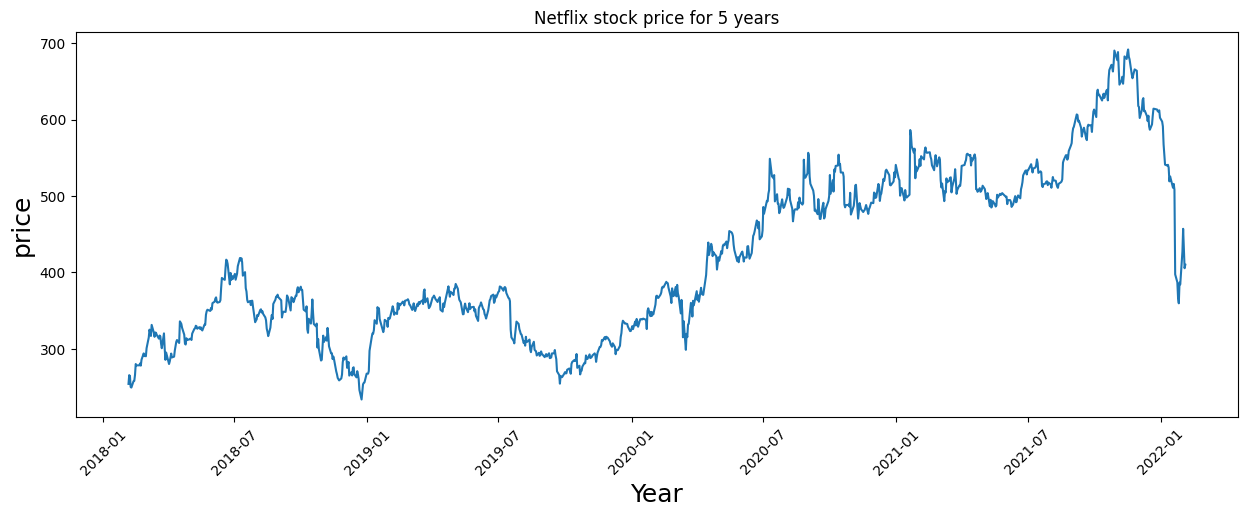

In [16]:
#plotting using matplotlib 

plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
plt.plot(df['Adj Close']) 
plt.title('Netflix stock price for 5 years') 
plt.ylabel('price', fontsize=18) 
plt.xlabel('Year', fontsize=18)

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>], dtype=object)

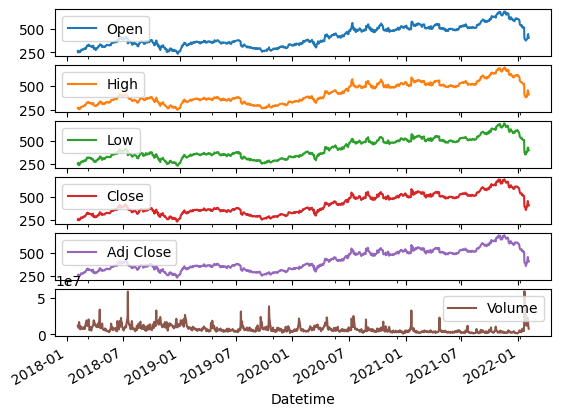

In [17]:
#plot the columns 

df.plot(subplots=True) 

In [18]:
#created the new columns
futures, target = df.drop(columns=['Close', 'Date', 'Volume'], axis=1), df['Close'] 

C:\Users\AJAY\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
C:\Users\AJAY\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
C:\Users\AJAY\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
C:\Users\AJAY

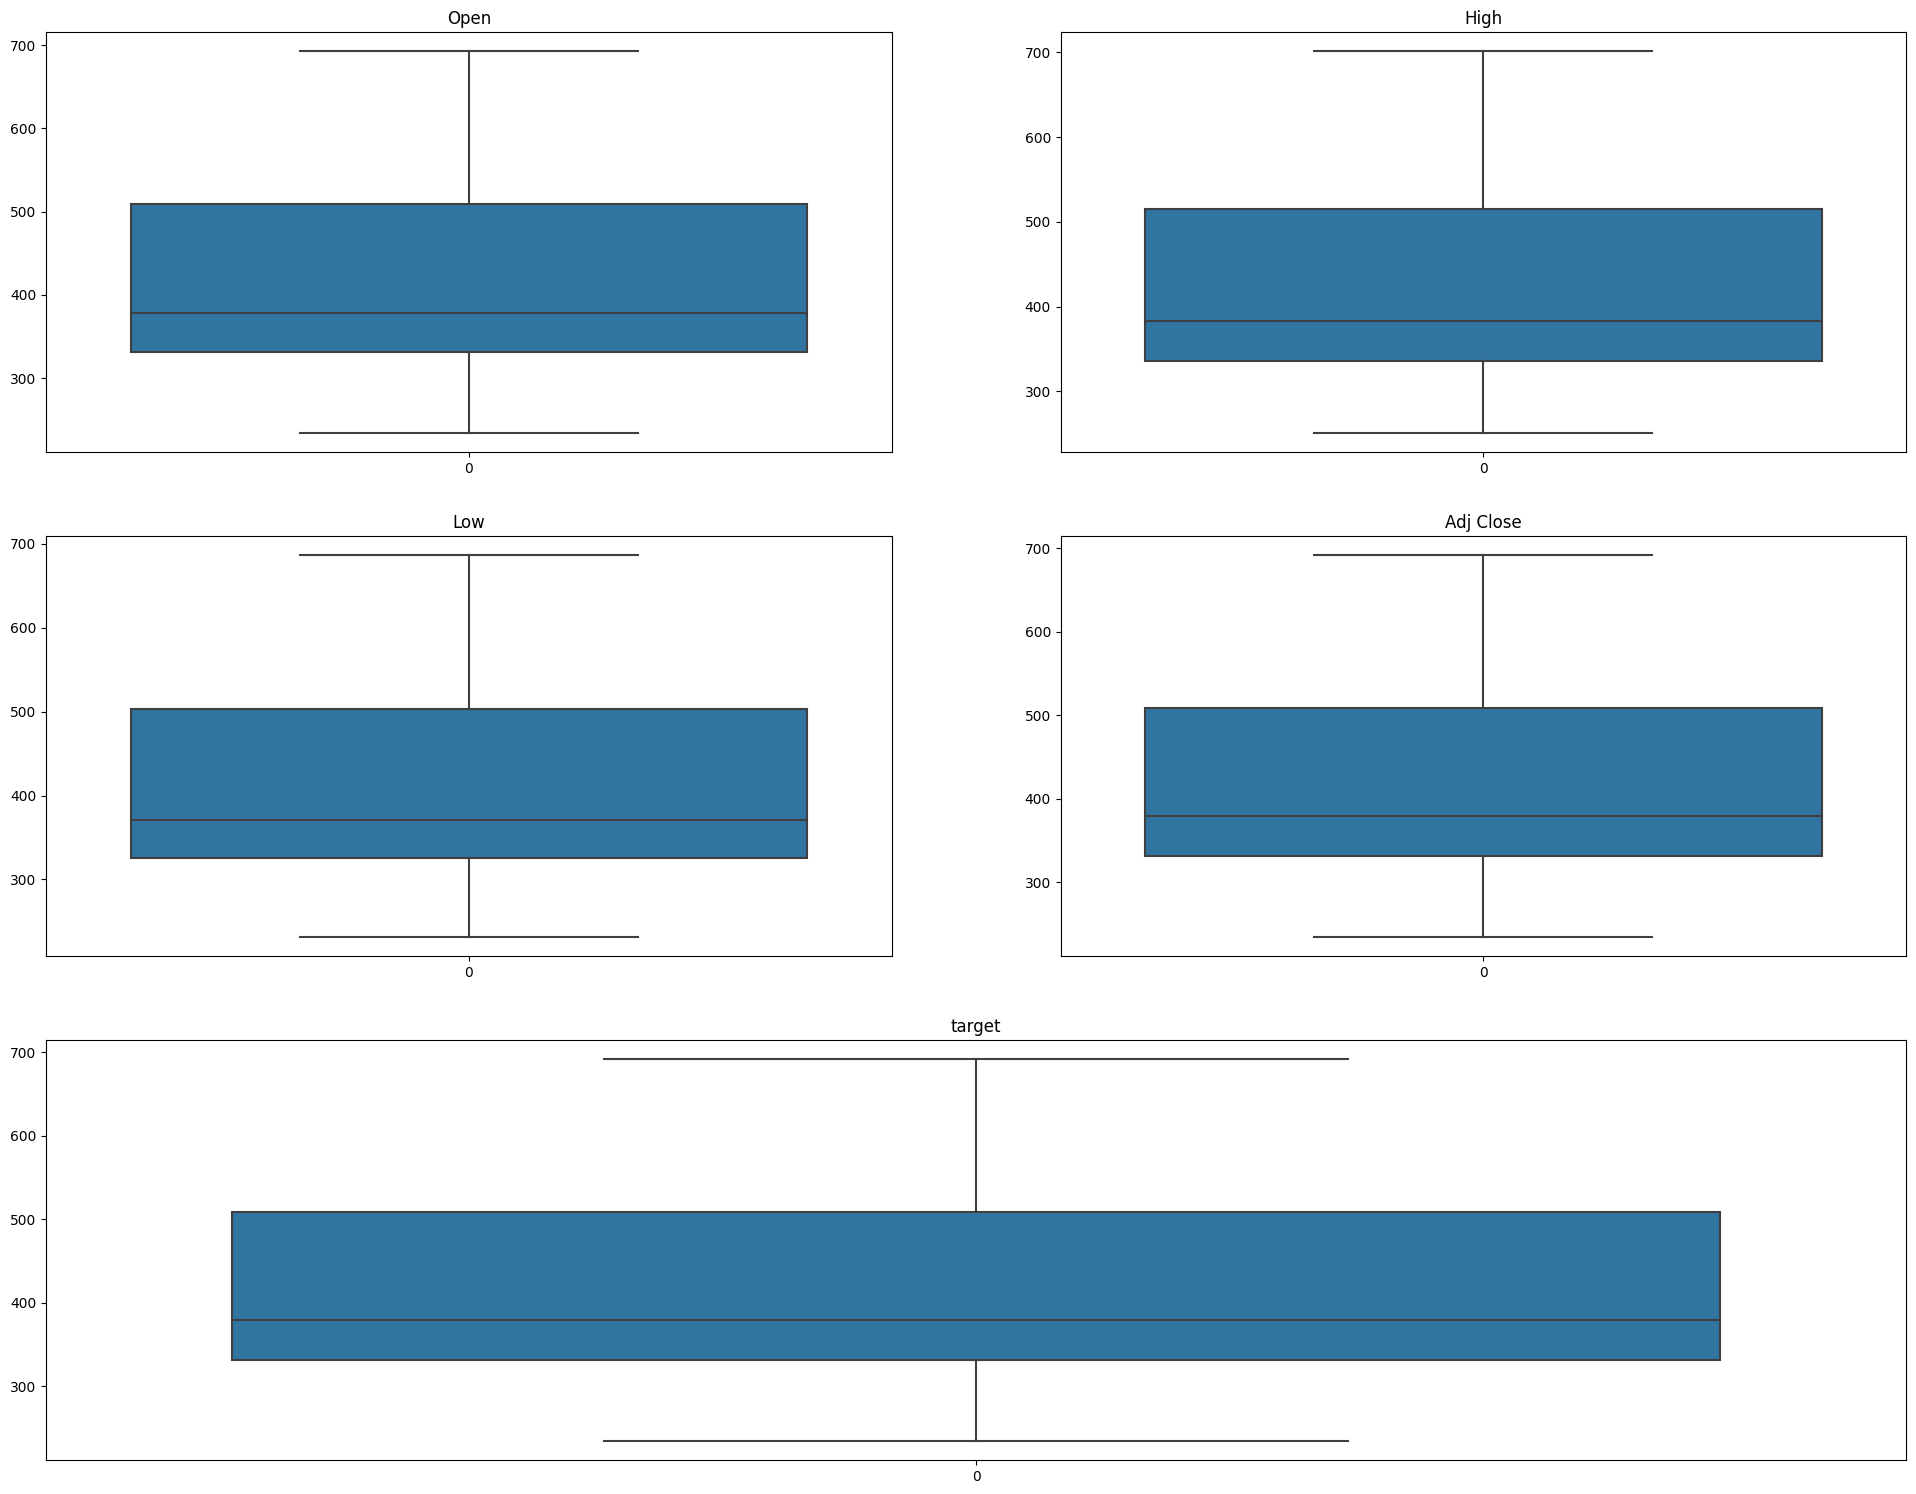

In [22]:
#analyze these columns 

nrows, ncols = 3, 2 
fig = plt.figure(figsize=(24, 12)) 

spec = GridSpec(ncols=ncols, nrows=nrows, figure=fig, top=1.3)
my_id = 0 
for i in range(nrows):
    for j in range(ncols):
        if i == nrows-1:
            ax = fig.add_subplot(spec[i, :])
            sns.boxplot(target)
            ax.set_title('target')
            break
        ax = fig.add_subplot(spec[i, j])
        sns.boxplot(futures.iloc[:, my_id])
        ax.set_title(futures.columns[my_id])
        my_id += 1

C:\Users\AJAY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


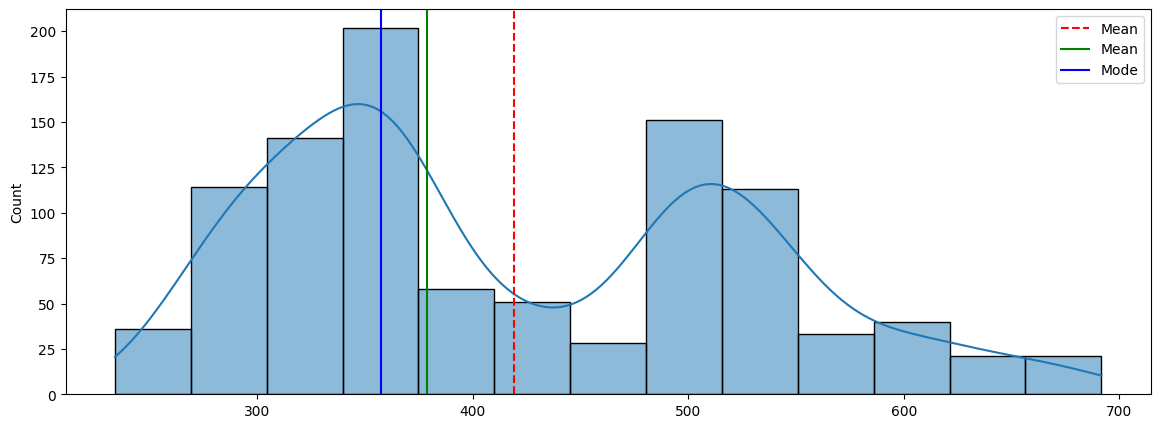

In [23]:
f, (ax1) = plt.subplots(1, 1, figsize=(14, 5))
# distribution of target values
v_dist_1 = target.values
# histogram plot
sns.histplot(v_dist_1, ax=ax1, kde=True)
# find the mean
mean=target.mean()
# find the median
median=target.median()
# find the mode
mode=target.mode().values[0]
# plot all of them together
ax1.axvline(mean, color='r', linestyle='--', label="Mean")
ax1.axvline(median, color='g', linestyle='-', label="Mean")
ax1.axvline(mode, color='b', linestyle='-', label="Mode")
ax1.legend()


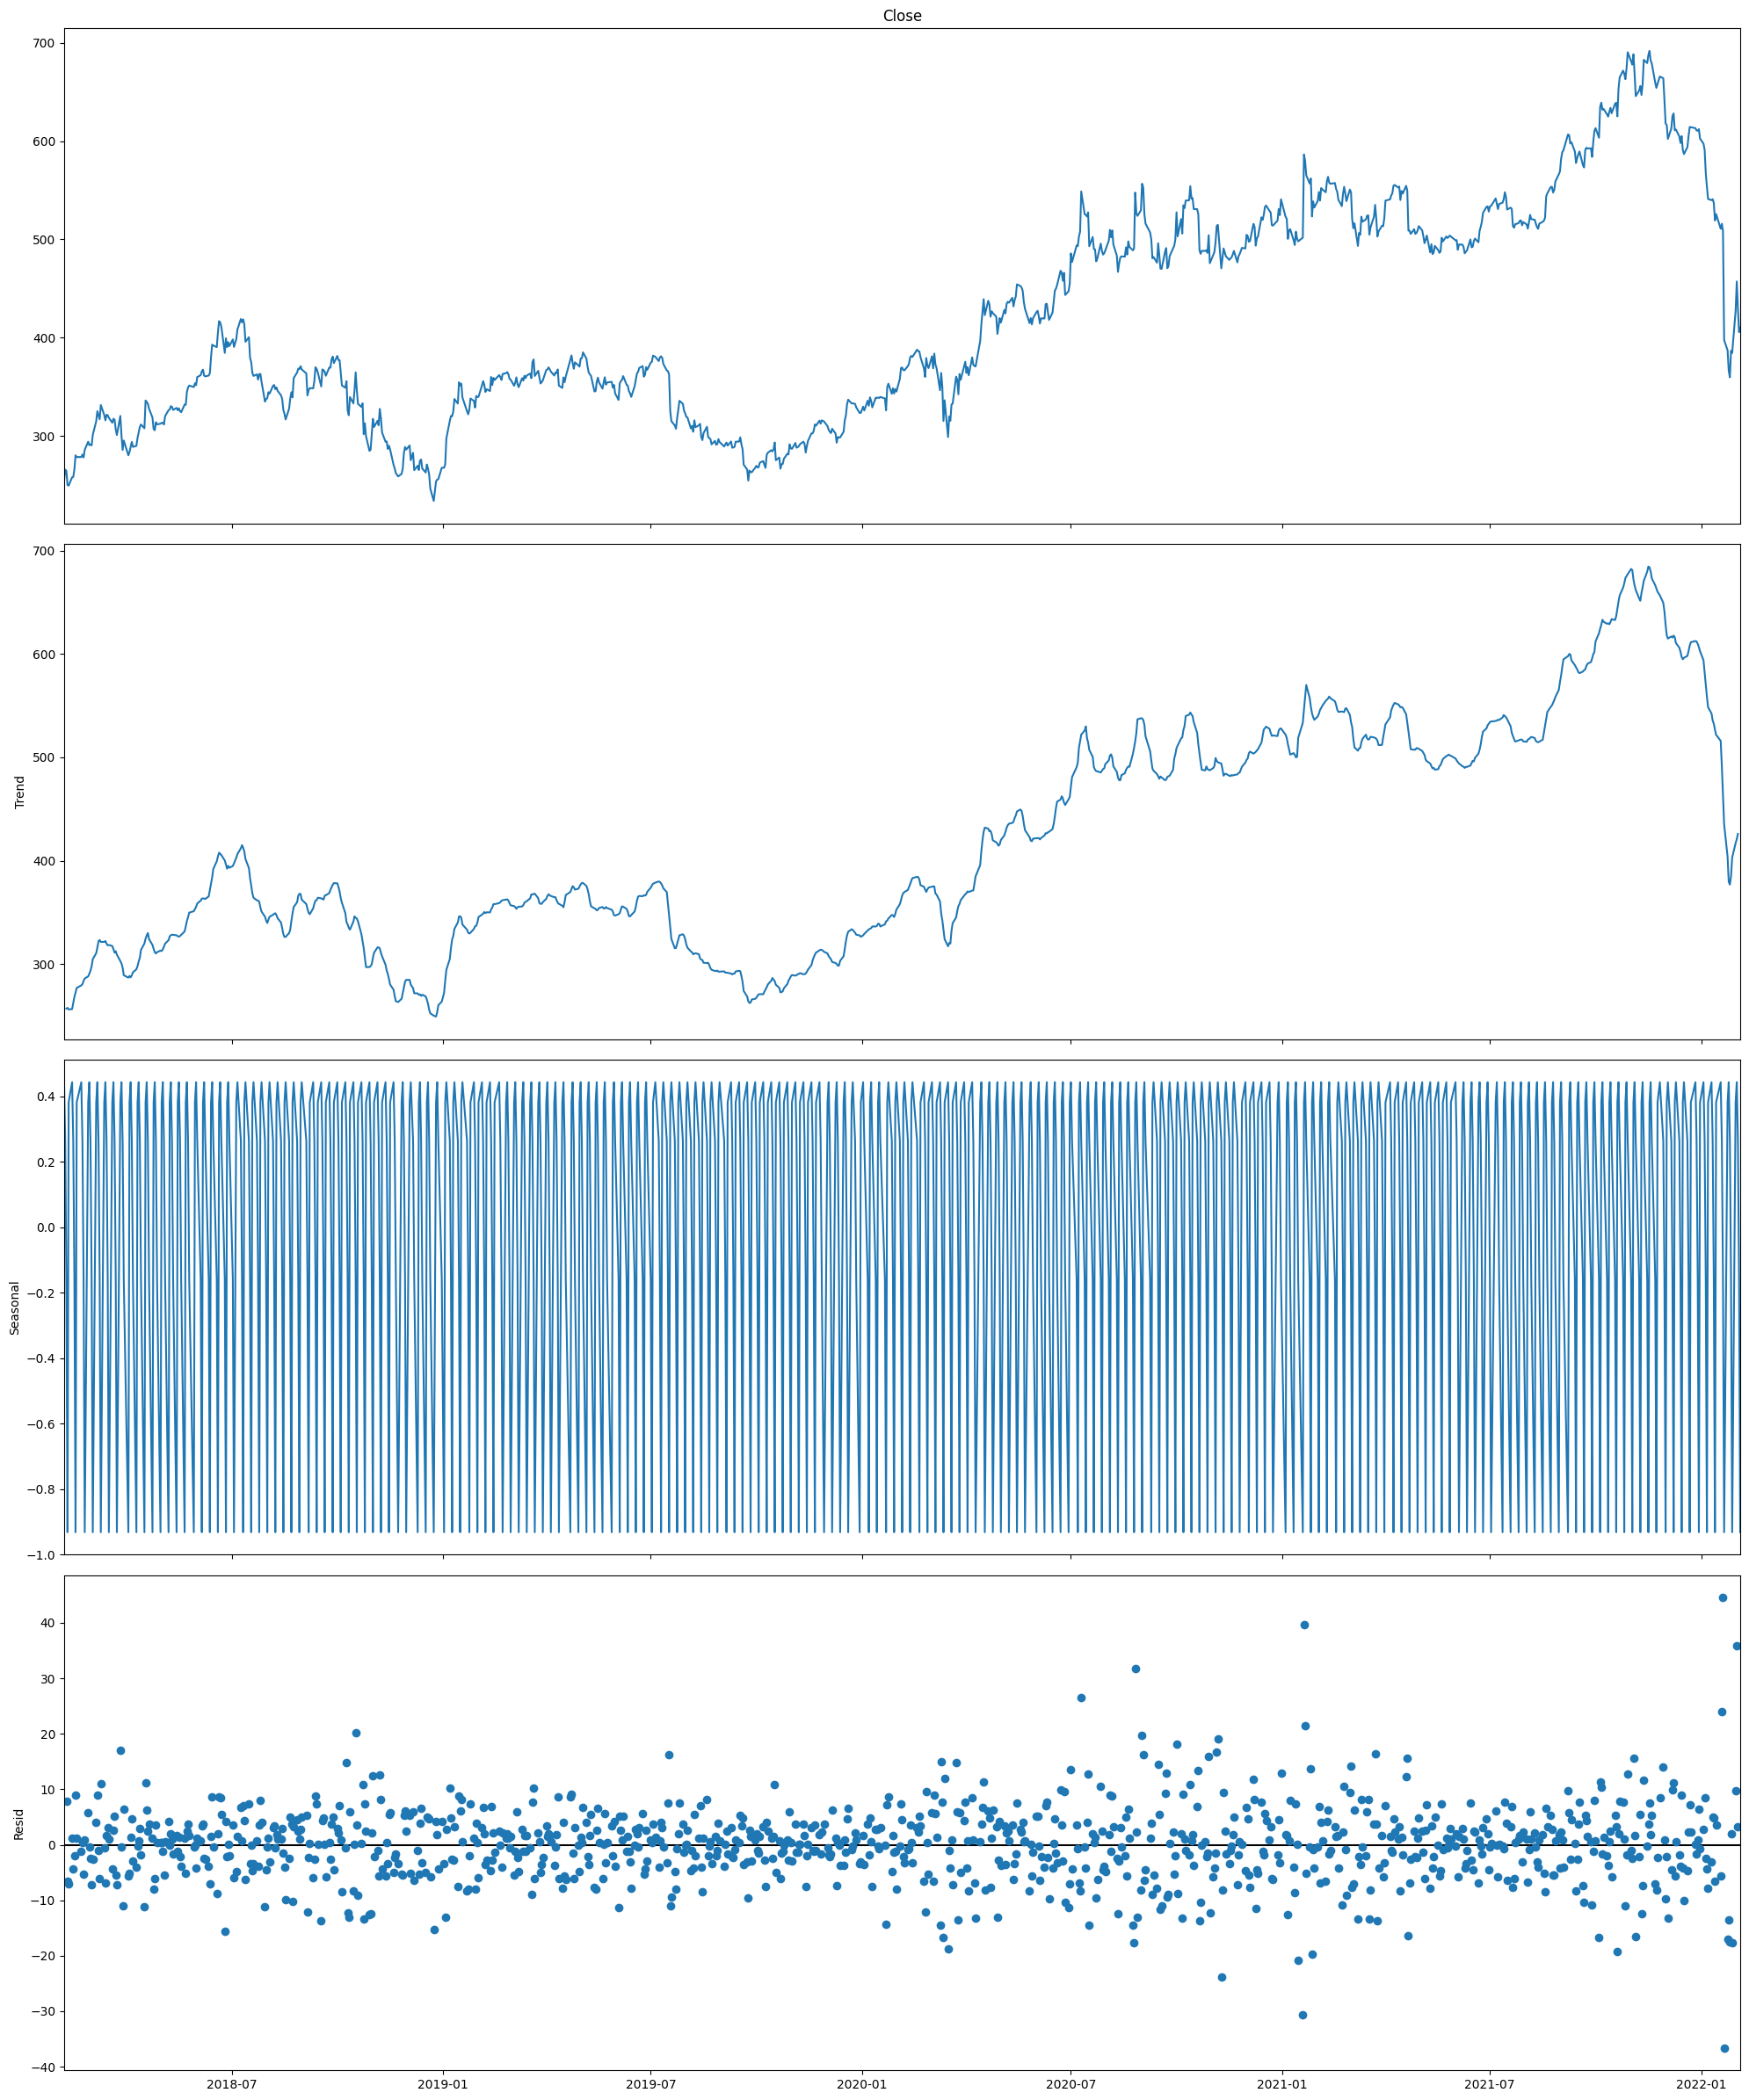

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 24

dec = sm.tsa.seasonal_decompose(df['Close'], period = 5, model = 'additive').plot()
plt.show() 

In [26]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=5).mean()
    MSTD = timeseries.rolling(window=5).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

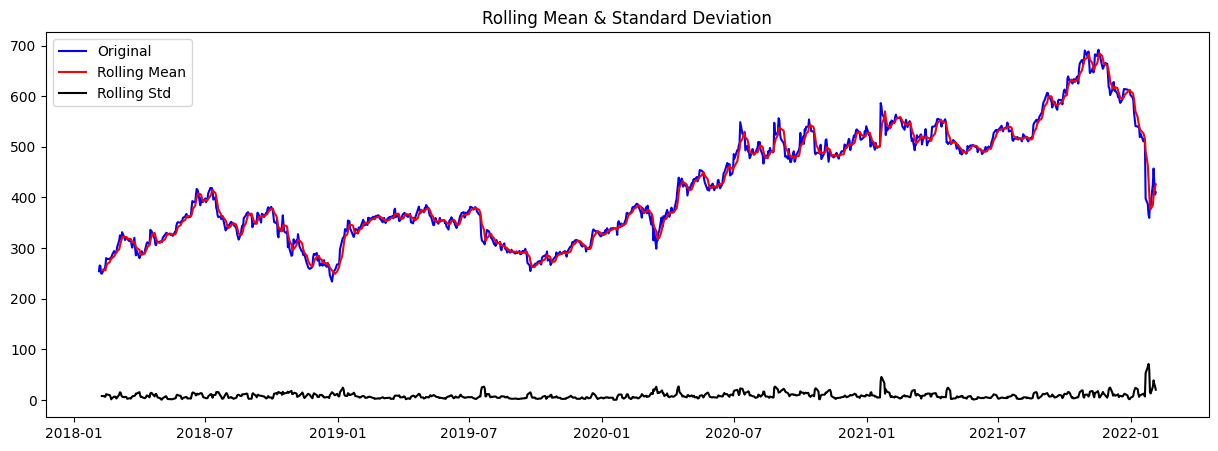

Results of Dickey-Fuller Test:
Test Statistic                   -1.812591
p-value                           0.374229
#Lags Used                        6.000000
Number of Observations Used    1002.000000
Critical Value (1%)              -3.436893
Critical Value (5%)              -2.864429
Critical Value (10%)             -2.568308
dtype: float64


In [27]:
test_stationarity(df['Close'])

In [28]:
# lets first subset the data frame
data = df[['Date', 'Close']]
#  setting date as index
data = data.set_index('Date')

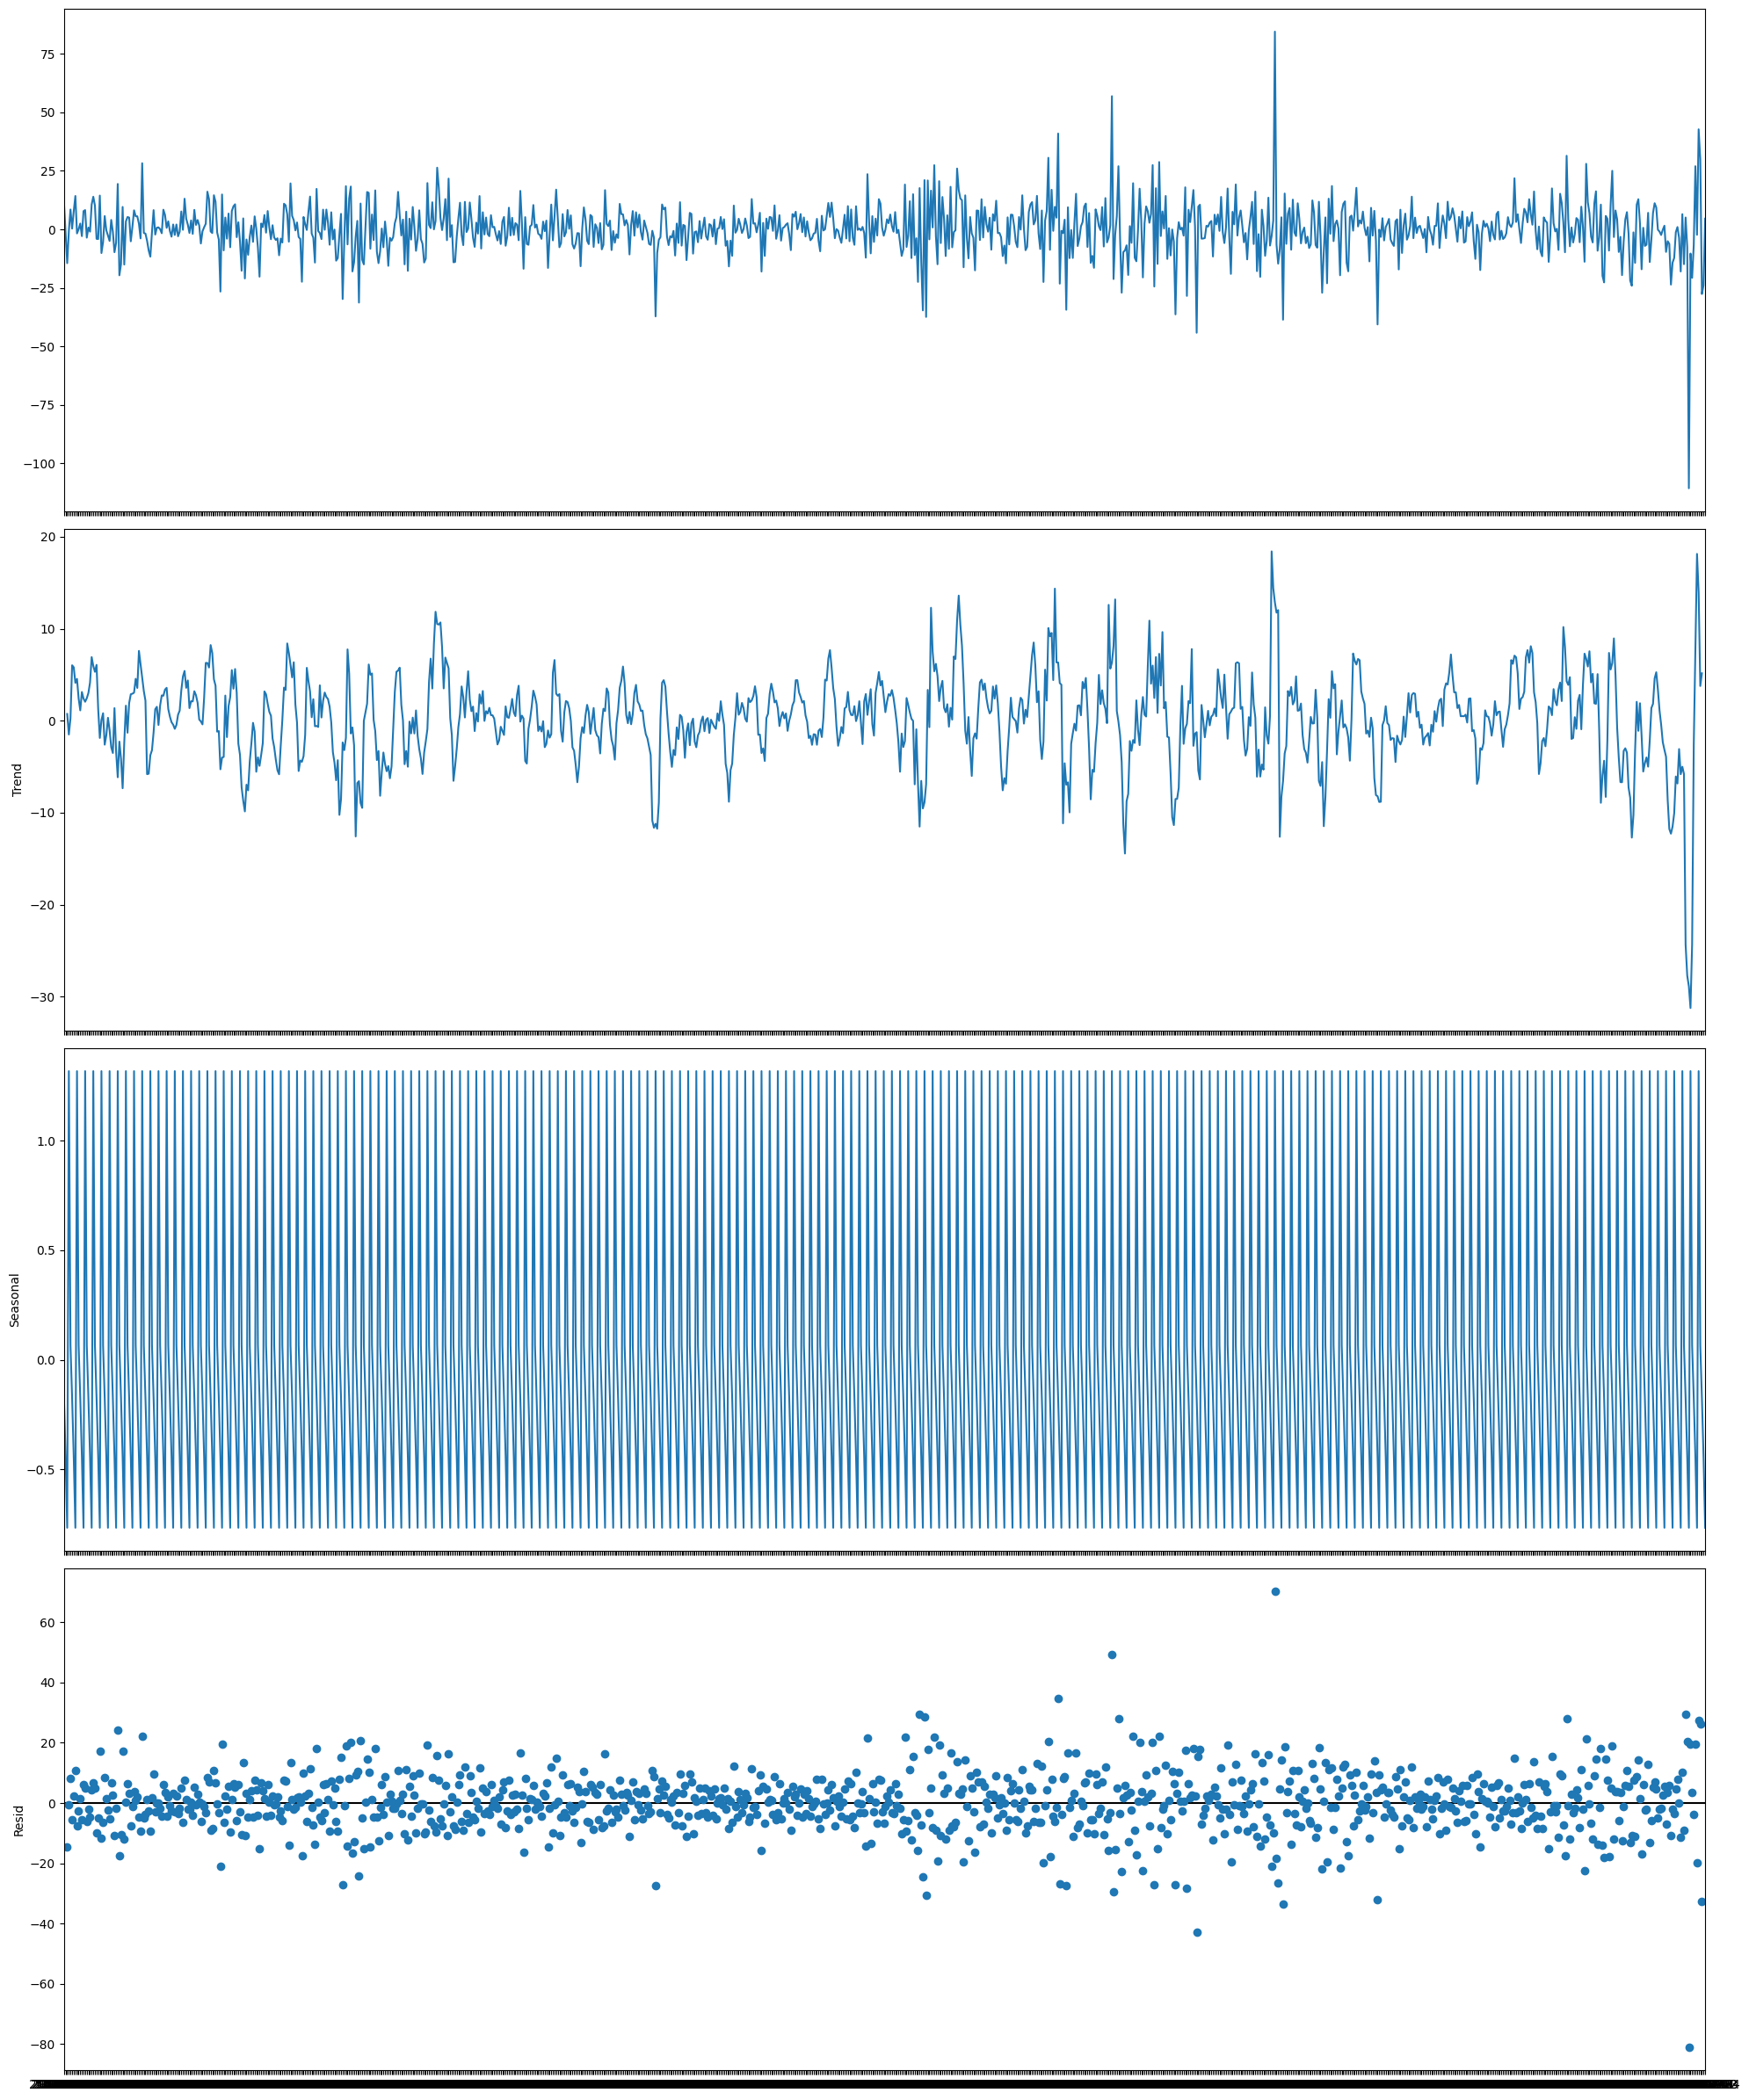

In [29]:
# Lets simply difference using 1 lag value and see if we can make this time series stationary
data_diff = data.diff()
data_diff = data_diff.dropna()
rcParams['figure.figsize'] = 20,24

# Lets now decompose and see

dec = sm.tsa.seasonal_decompose(data_diff,period = 5).plot()
plt.show()

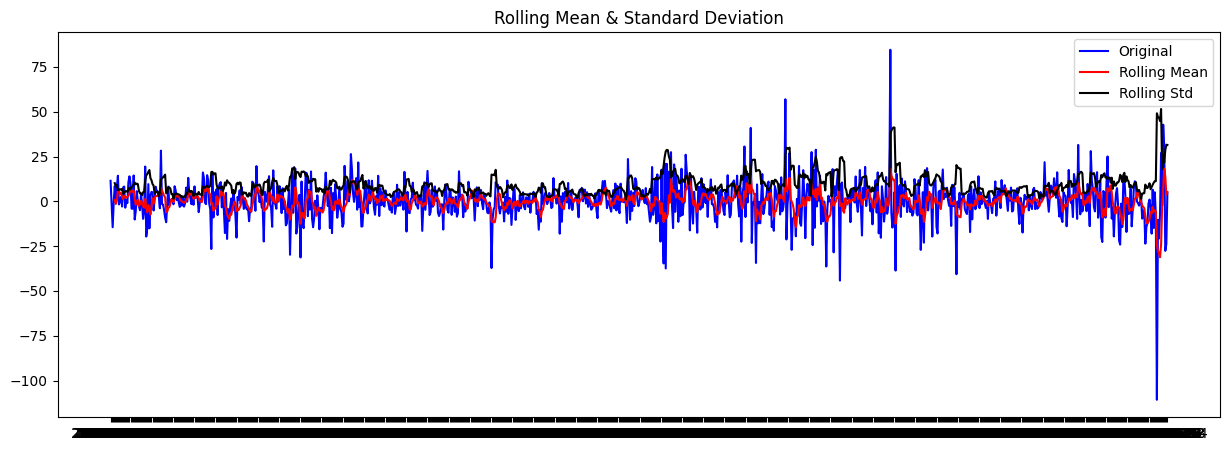

Results of Dickey-Fuller Test:
Test Statistic                -1.424228e+01
p-value                        1.530402e-26
#Lags Used                     5.000000e+00
Number of Observations Used    1.002000e+03
Critical Value (1%)           -3.436893e+00
Critical Value (5%)           -2.864429e+00
Critical Value (10%)          -2.568308e+00
dtype: float64


In [30]:
test_stationarity(data_diff) 

# modleing time series

In [31]:
def plotResults(data, forcast, label):
    plt.figure(figsize=(20, 10))
    plt.plot(data, label='Train')
    naive = plt.plot(forecast, label=label)
    plt.legend(loc='best')
    plt.title(label+' forecast')
    return plt

In [33]:
from sklearn.metrics import mean_squared_error 

def getMetrics(data, forecast, method):
    rmse = np.sqrt(mean_squared_error(data, forecast)).round(2)


    results = pd.DataFrame({'Method':[method], 'RMSE': [rmse]})
    results = results[['Method', 'RMSE']]
    return results

In [34]:
models = [] 
results = []

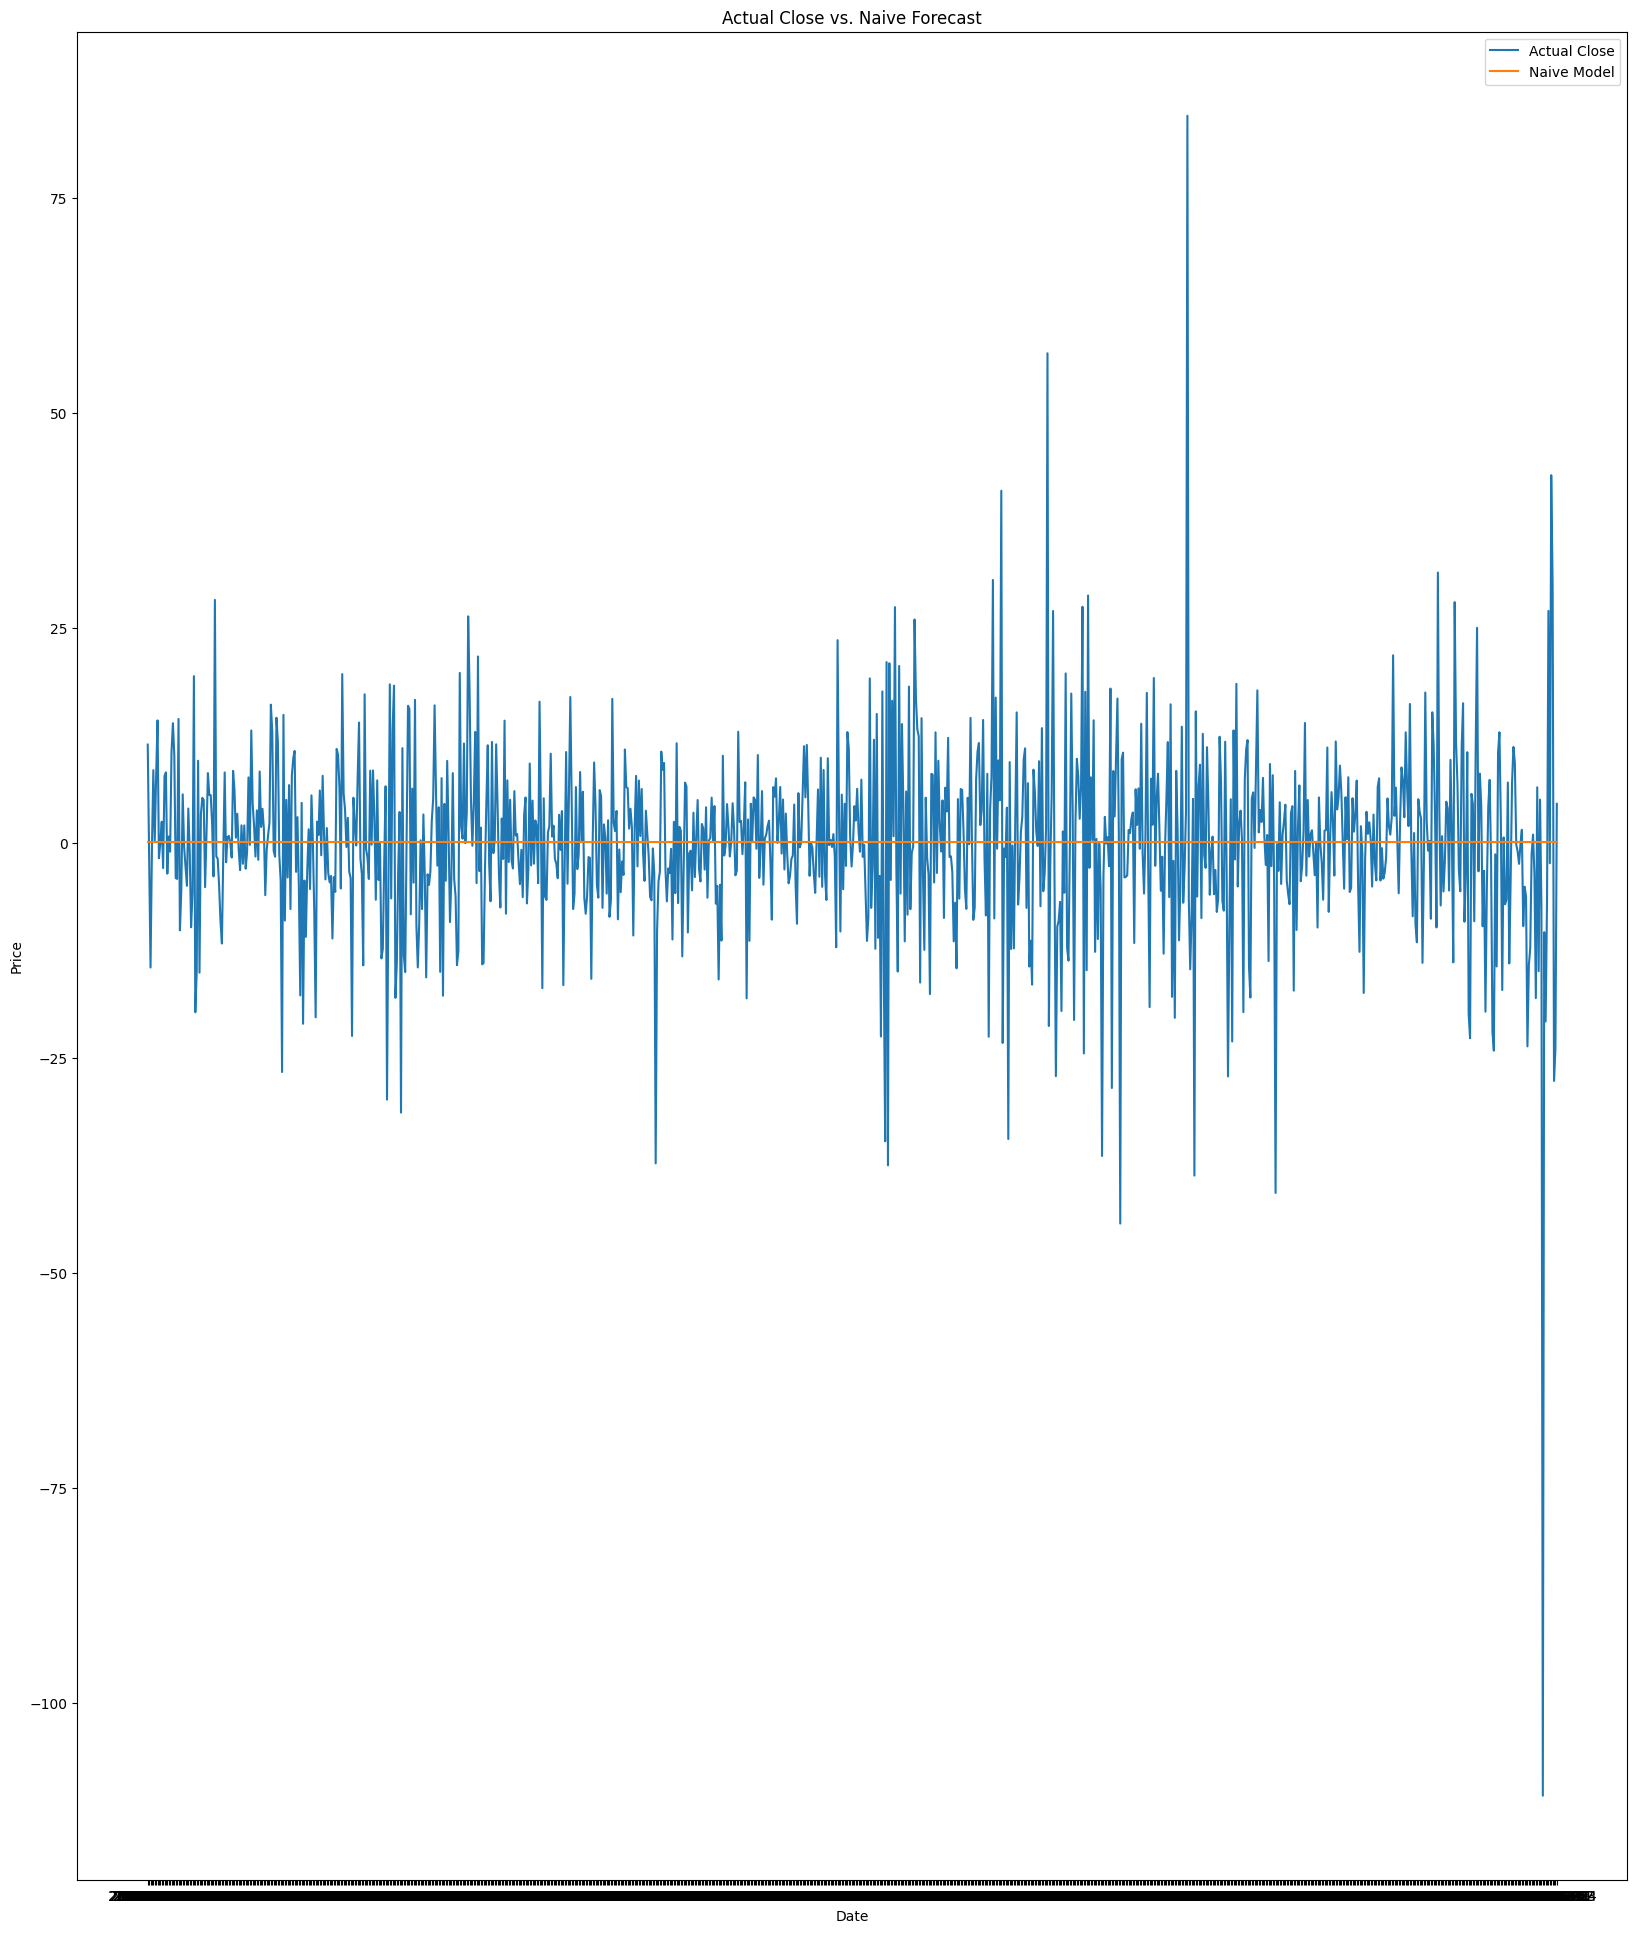

In [42]:
# naiveModelResult = data_diff.copy()
data_diff['naive_forecast'] = data_diff['Close'].mean()  # Calculate naive forecast
label = "Naive Model"
plt.plot(data_diff.index, data_diff['Close'], label='Actual Close')
plt.plot(data_diff.index, data_diff['naive_forecast'], label=label)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Close vs. Naive Forecast')
plt.legend()
plt.show()

In [36]:
models.append("Naive Model")

final=getMetrics(data_diff['Close'],data_diff['naive_forecast'], "Naive Model")
results.append(final.RMSE.tolist()[0])
final

Method   RMSE
0  Naive Model  11.05

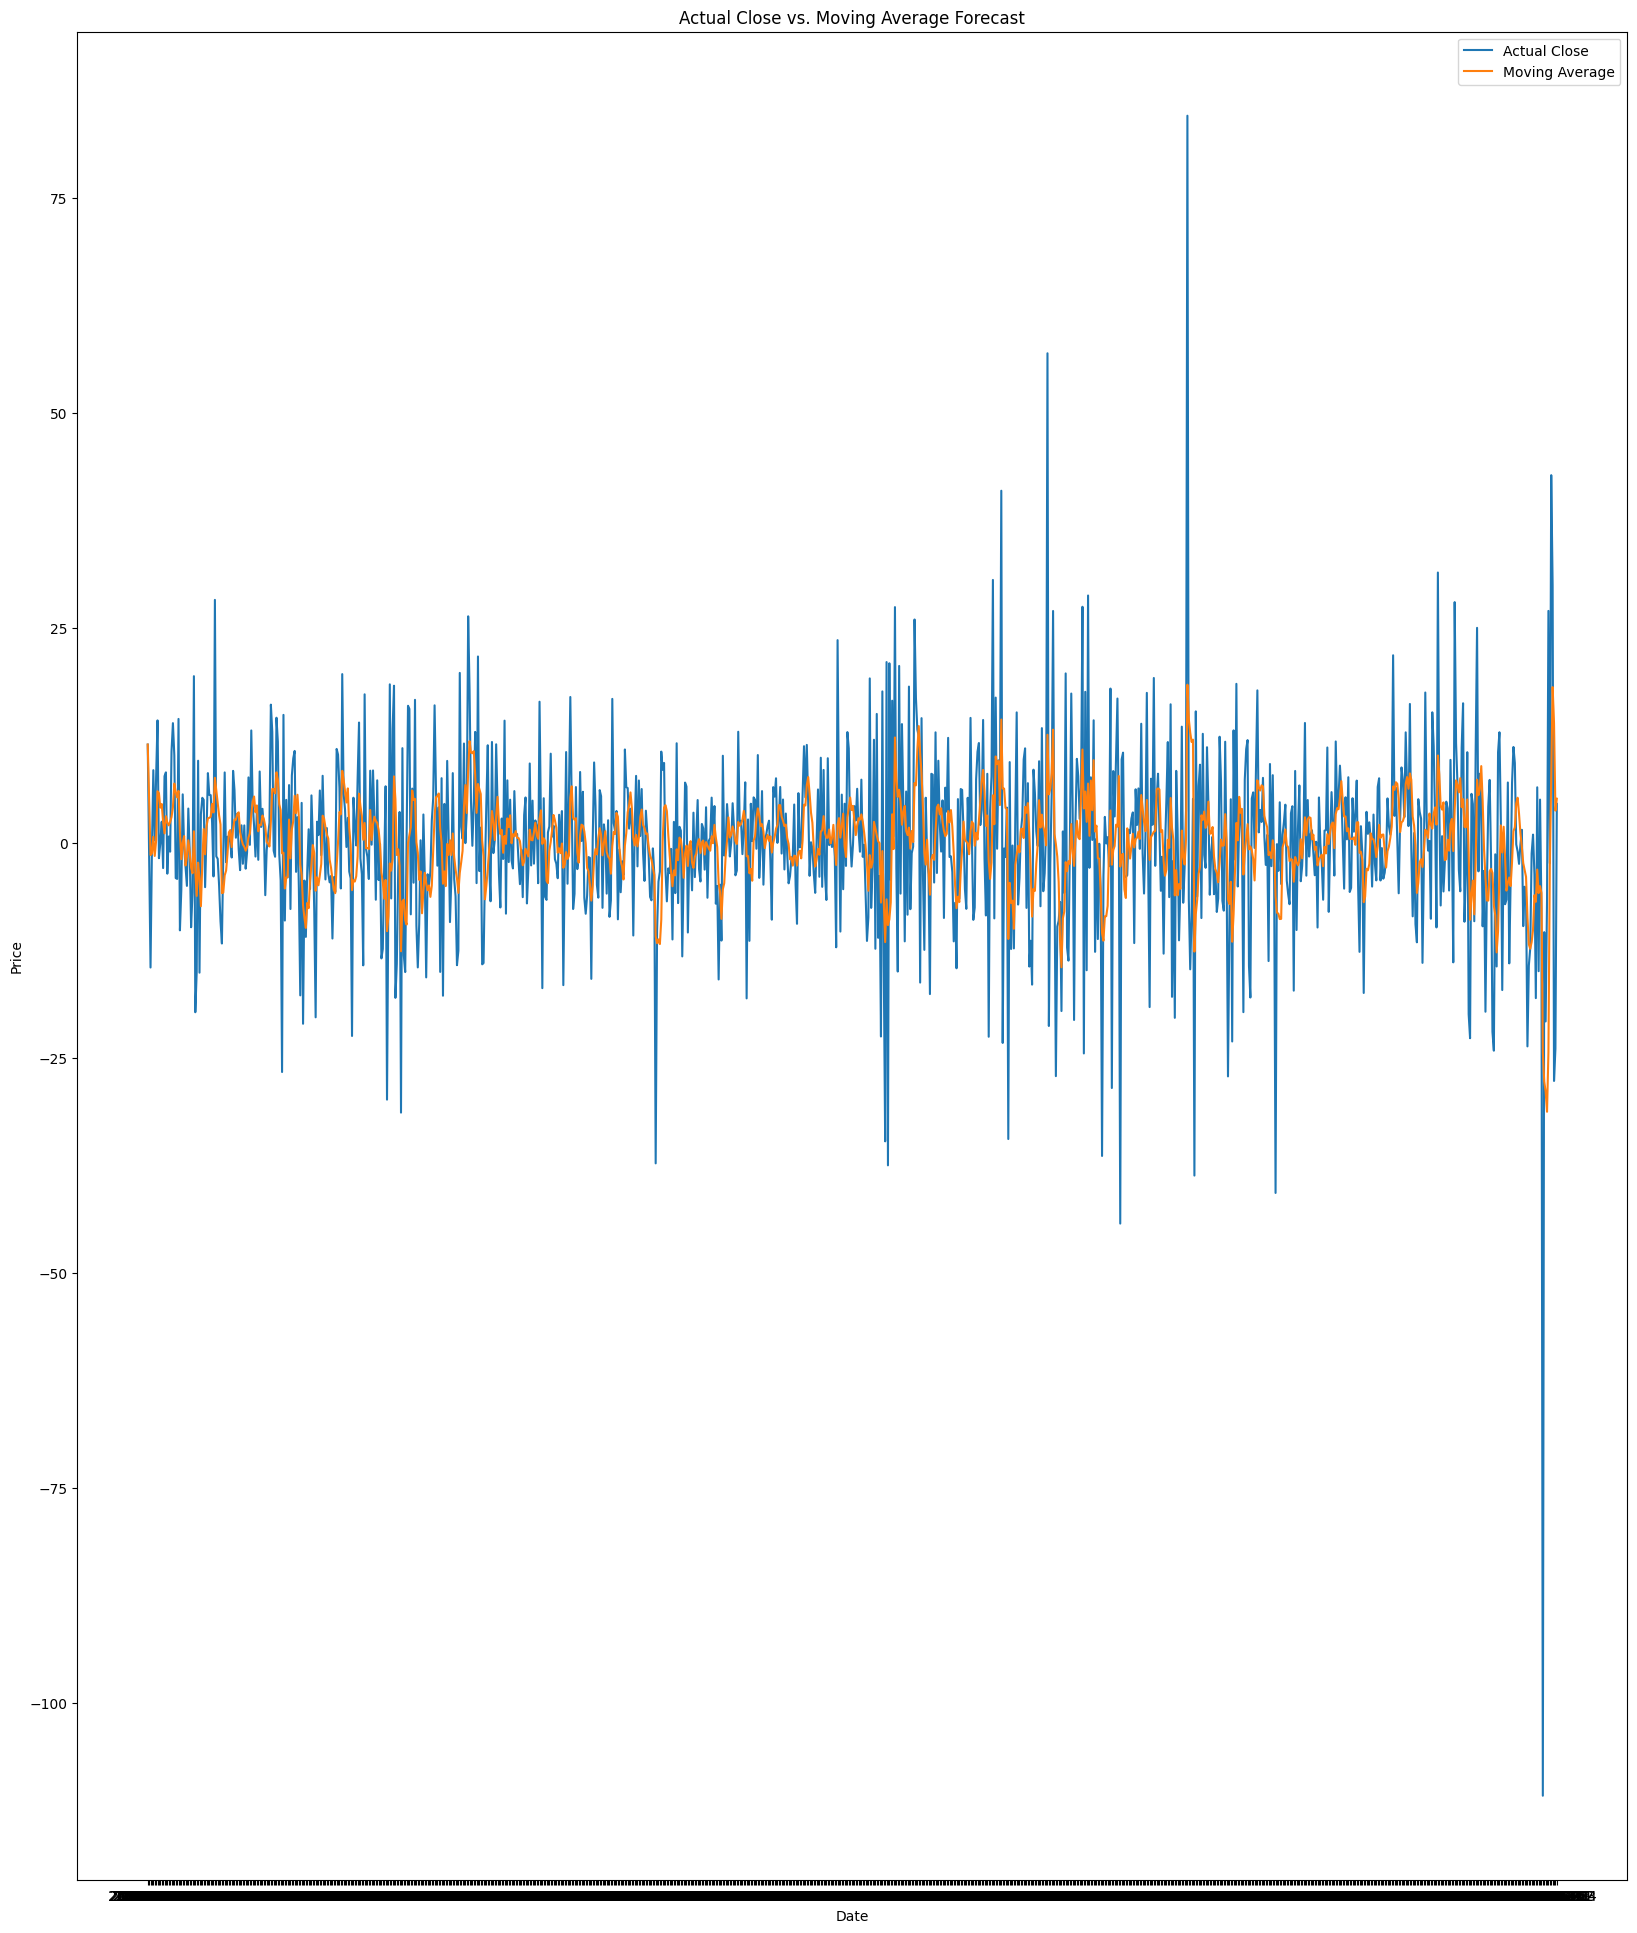

In [43]:
label = "Moving Average"
plt.plot(data_diff.index, data_diff['Close'], label='Actual Close')
plt.plot(data_diff.index, data_diff['maForecast'], label=label)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Close vs. Moving Average Forecast')
plt.legend()
plt.show()

In [38]:
# store and print results

models.append("Moving Average")

final=getMetrics(data_diff['Close'],data_diff['maForecast'],"Moving Average")

results.append(final.RMSE.tolist()[0])
final

Method  RMSE
0  Moving Average  9.81

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [40]:
# lets define simple exponential smoothening with different values of smoothing level alpha 
fit1 = SimpleExpSmoothing(data_diff.Close, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(data_diff.Close, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(data_diff.Close, initialization_method="estimated").fit()
fcast3 = fit3.forecast(3).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])


C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

NameError: name 'forecast' is not defined

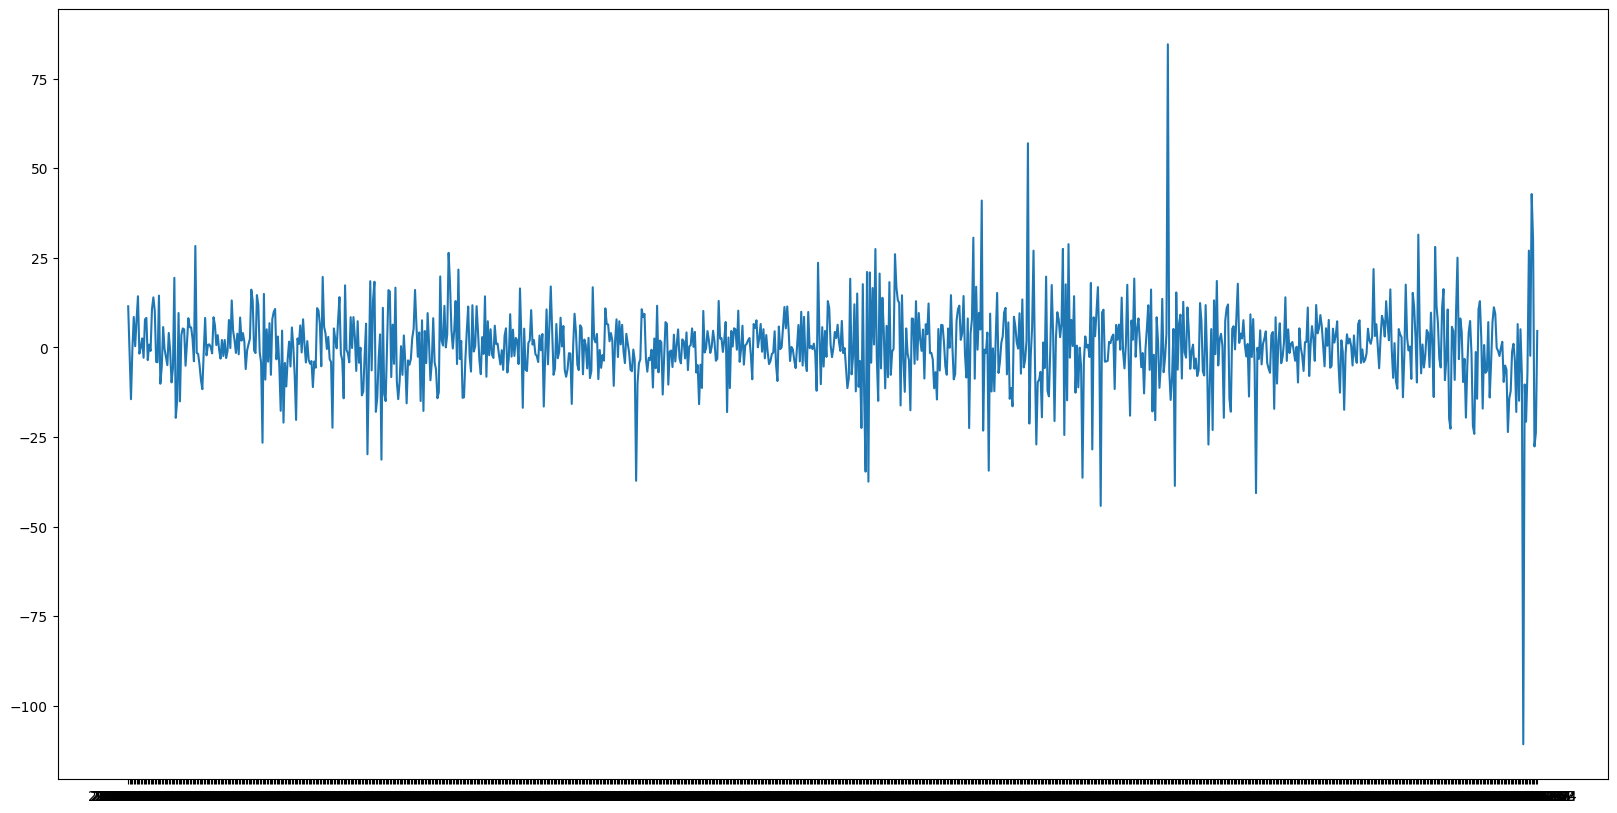

In [46]:
plotResults(data_diff.Close,fit1.fittedvalues, "Exponential Smoothening 1").show()


In [47]:
getMetrics(data_diff.Close,fit1.fittedvalues,"Exponential Smoothening 1")

Method   RMSE
0  Exponential Smoothening 1  11.72

NameError: name 'forecast' is not defined

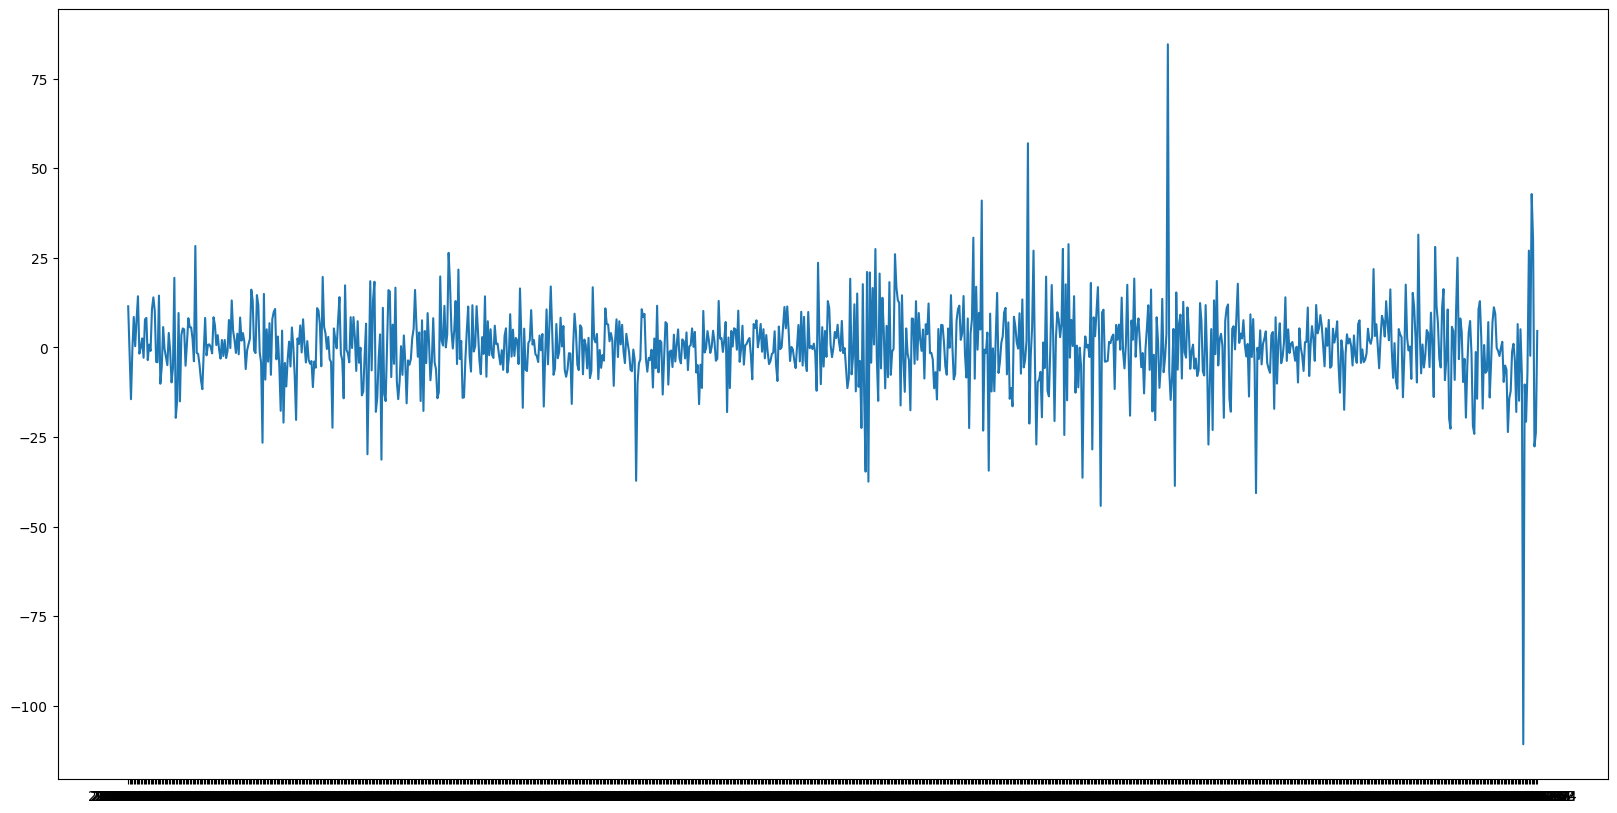

In [48]:
plotResults(data_diff.Close,fit2.fittedvalues, "Exponential Smoothening 2").show()

In [49]:
getMetrics(data_diff.Close,fit2.fittedvalues,"Exponential Smoothening 2")

Method   RMSE
0  Exponential Smoothening 2  13.38

NameError: name 'forecast' is not defined

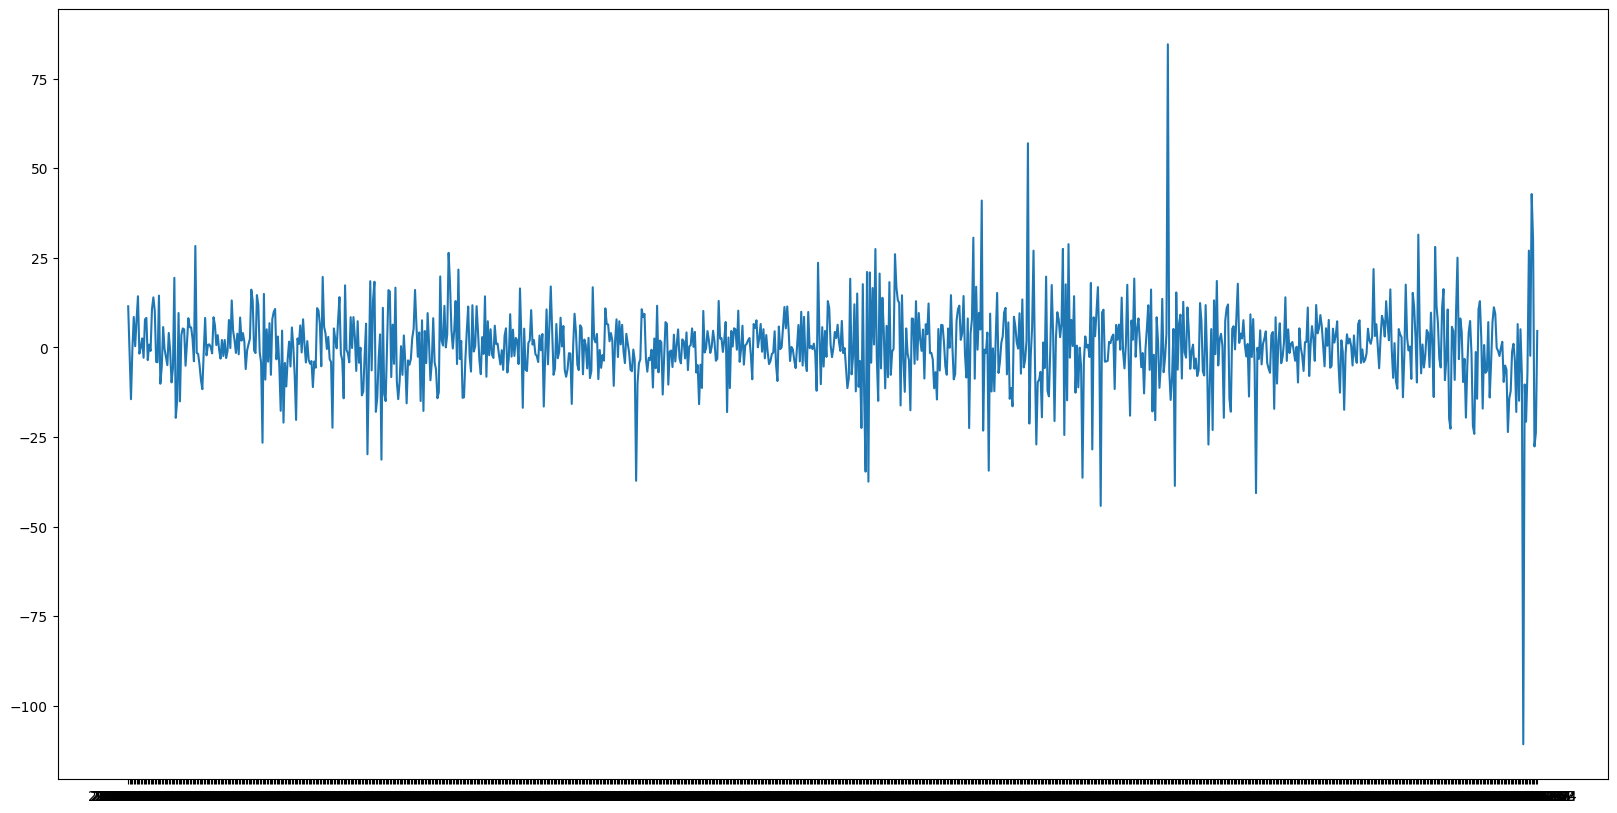

In [50]:
plotResults(data_diff.Close,fit3.fittedvalues, "Exponential Smoothening 3").show()

In [51]:
getMetrics(data_diff.Close,fit3.fittedvalues,"Exponential Smoothening 3")

Method   RMSE
0  Exponential Smoothening 3  11.05

In [52]:
final=getMetrics(data_diff.Close,fit3.fittedvalues,"Exponential Smoothening 3")
models.append("Single Exponential Smoothening")
results.append(final.RMSE.tolist()[0])
final

Method   RMSE
0  Exponential Smoothening 3  11.05

In [53]:
doubleExp= ExponentialSmoothing(data_diff.Close, trend='add').fit()

C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


NameError: name 'forecast' is not defined

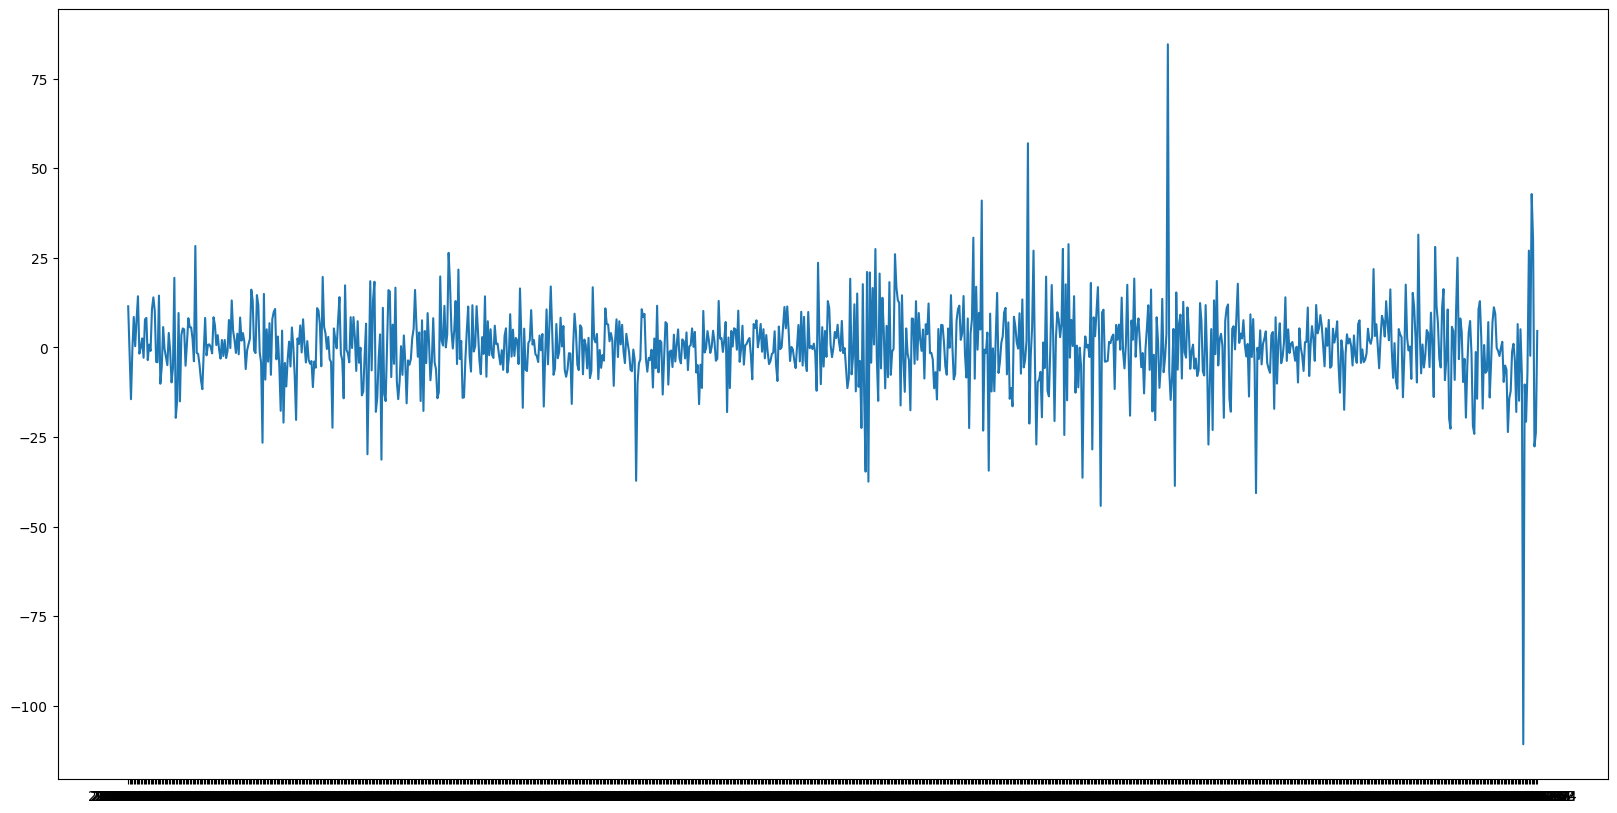

In [54]:
plotResults(data_diff.Close,doubleExp.fittedvalues, "Double Exponential Smoothening ").show()
final=getMetrics(data_diff.Close,doubleExp.fittedvalues, "Double Exponential Smoothening ")

In [55]:
models.append("Double Exponential Smoothening")
results.append(final.RMSE.tolist()[0])
final

Method   RMSE
0  Exponential Smoothening 3  11.05

In [56]:
# Define triple exponential smoothening
tripleExp= ExponentialSmoothing(data_diff.Close, trend='add', seasonal='add', seasonal_periods=10).fit()


C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


NameError: name 'forecast' is not defined

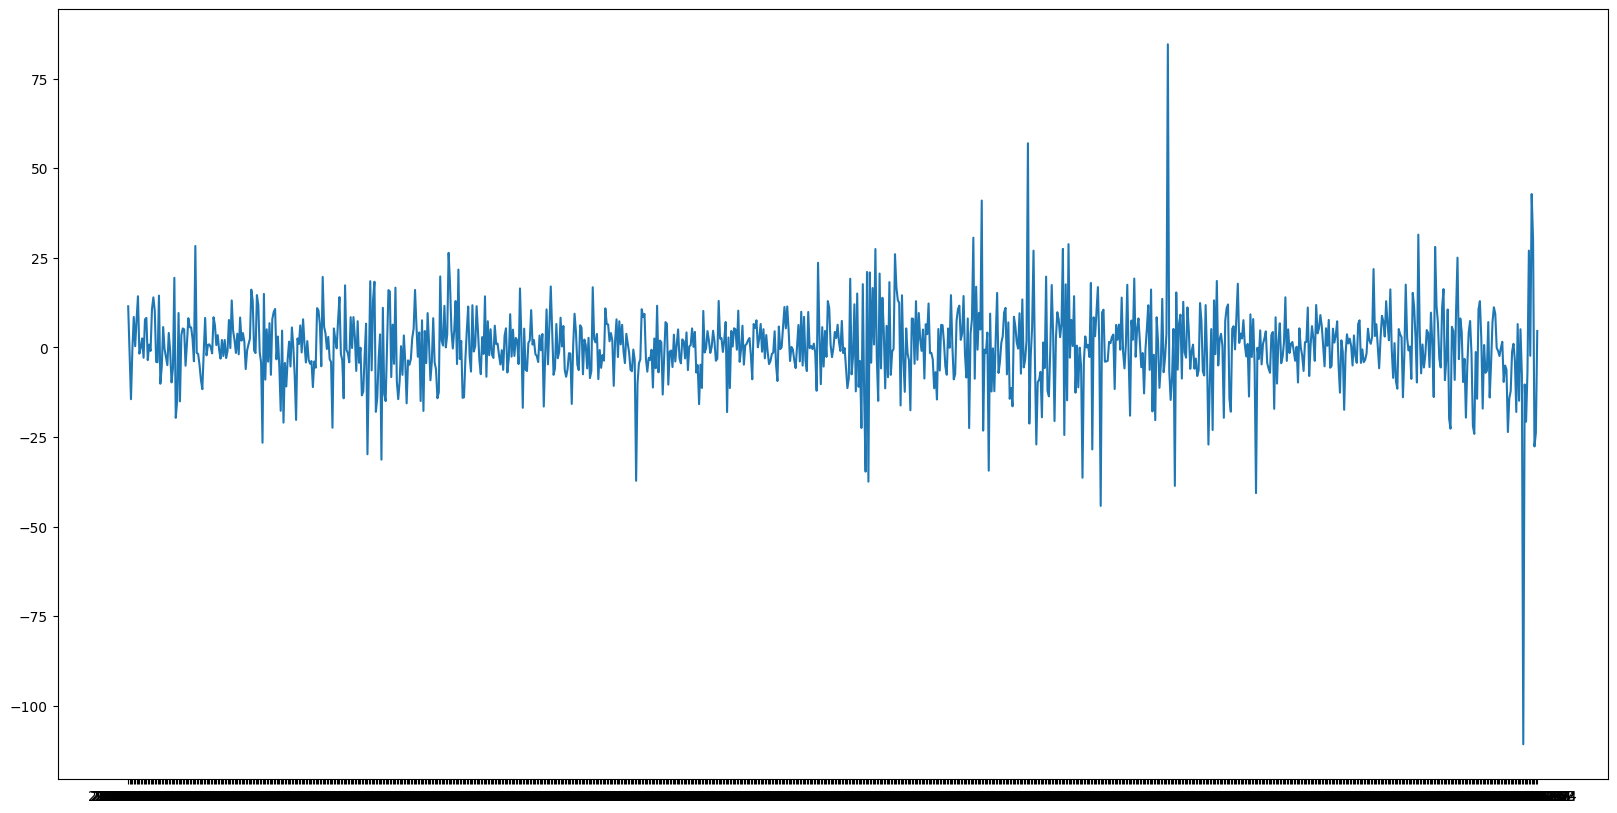

In [57]:
# plot and get metrics
plotResults(data_diff.Close,tripleExp.fittedvalues, "Triple Exponential Smoothening").show()
final=getMetrics(data_diff.Close,tripleExp.fittedvalues,  "Triple Exponential Smoothening")

In [58]:
# store and print results

models.append("Triple Exponential Smoothening")

results.append(final.RMSE.tolist()[0])
final

Method   RMSE
0  Exponential Smoothening 3  11.05

C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


NameError: name 'forecast' is not defined

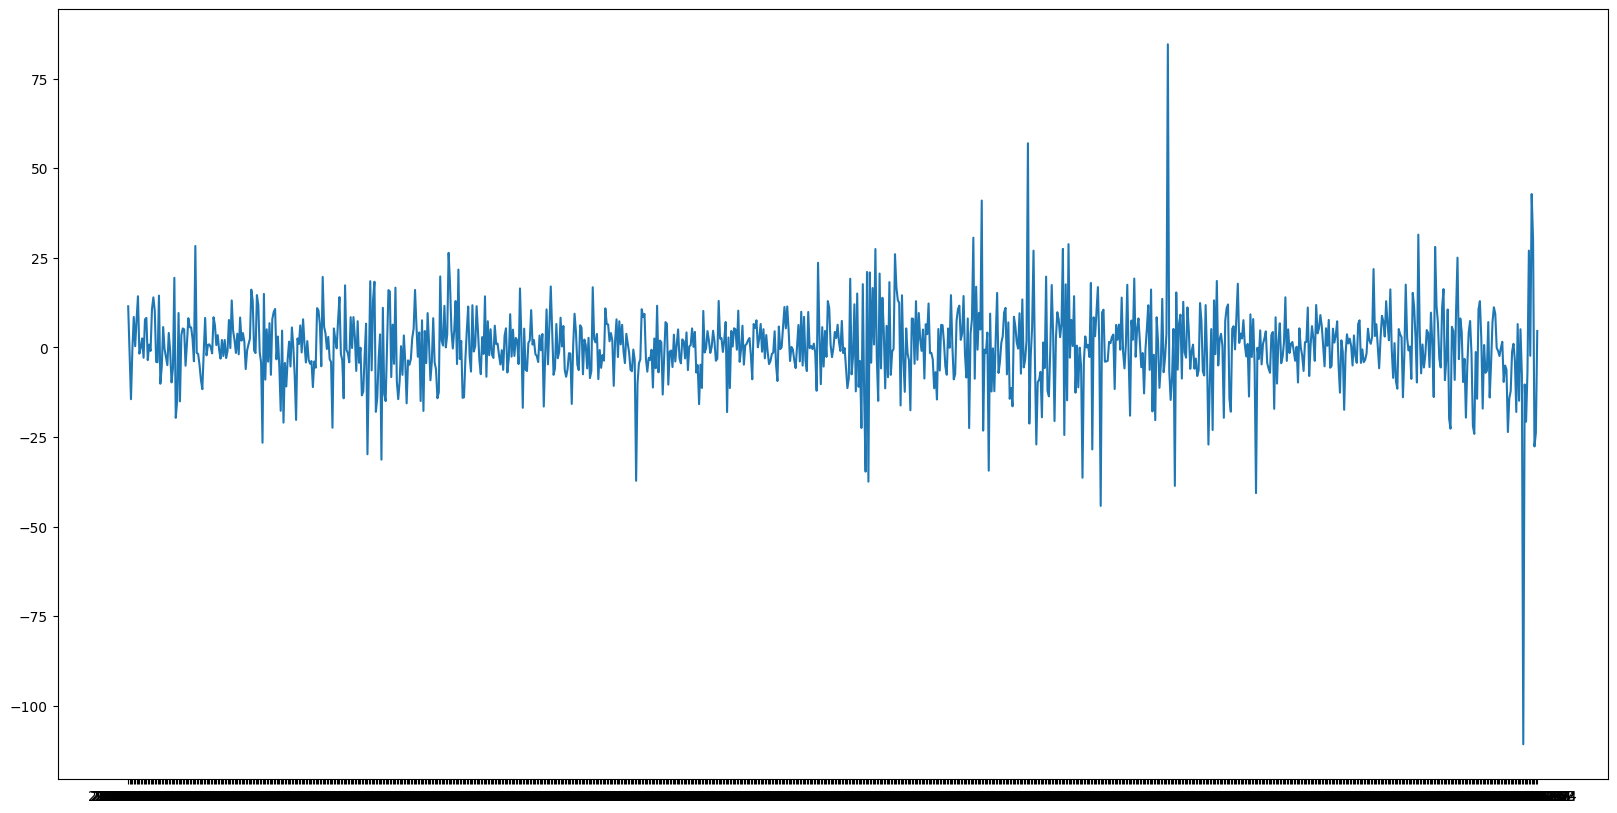

In [59]:
from statsmodels.tsa.ar_model import AutoReg
# fit model
arModel = AutoReg(data_diff.Close, lags=25)
res = arModel.fit()
# make prediction
plotResults(data_diff.Close,res.fittedvalues, "Autoregression").show()
final=getMetrics(data_diff.Close[0:-25],res.fittedvalues,"Autoregression")

In [60]:
# store and print results


models.append("Autoregression")

results.append(final.RMSE.tolist()[0])
final

Method   RMSE
0  Exponential Smoothening 3  11.05

C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


NameError: name 'forecast' is not defined

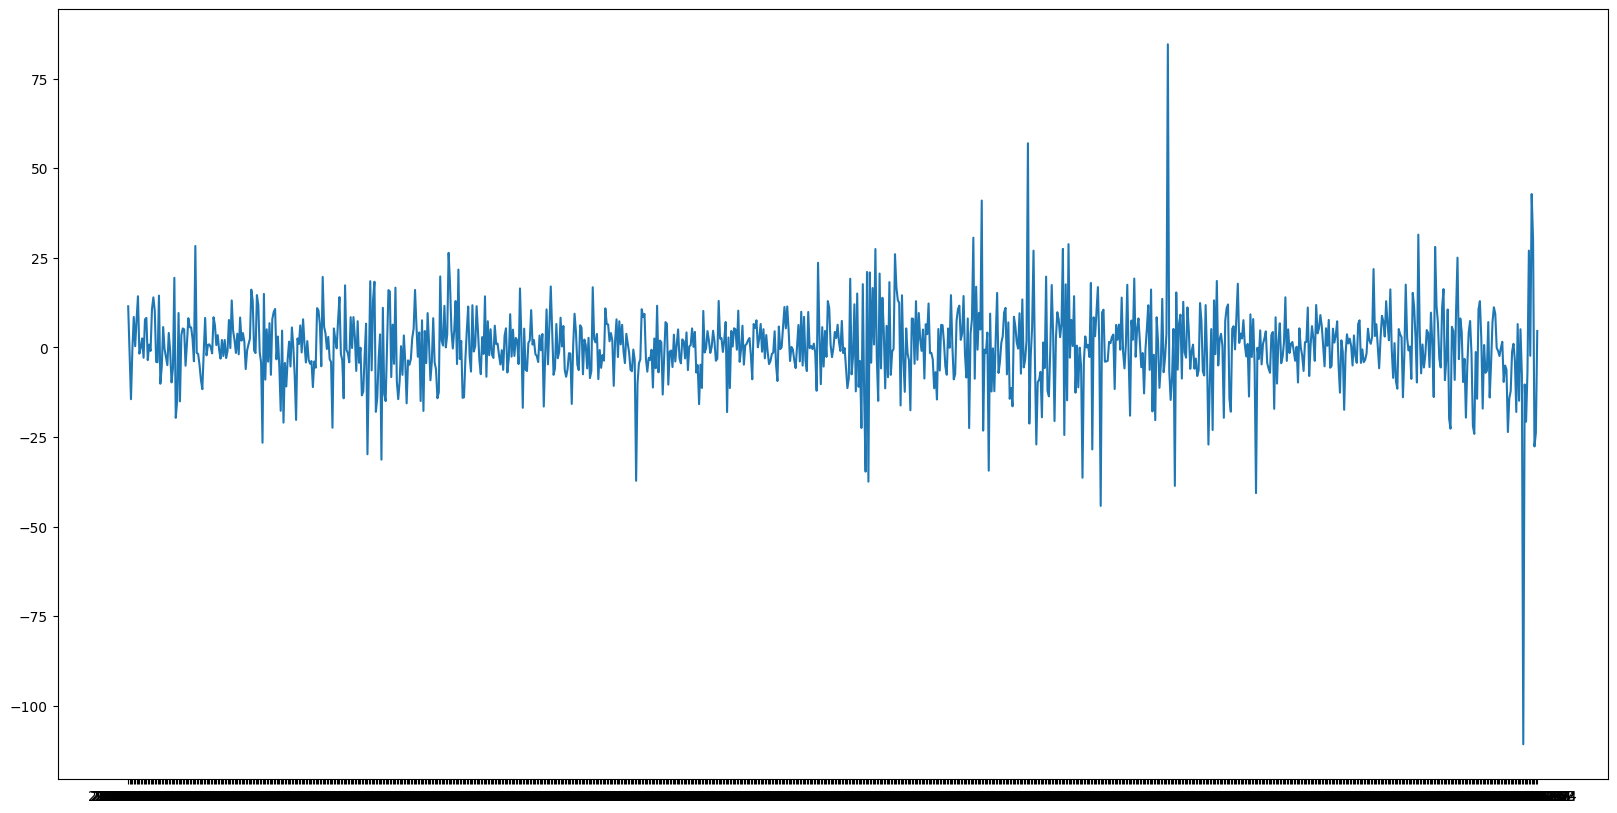

In [61]:

# fit model
model = ARIMA(data_diff.Close, order=(1, 0, 5))
armaModel = model.fit()


# make prediction, plot and get metrics
plotResults(data_diff.Close,armaModel.fittedvalues, "ARMA").show()
final=getMetrics(data_diff.Close,armaModel.fittedvalues, "ARMA")

In [62]:
# store and print results


models.append("ARMA")

results.append(final.RMSE.tolist()[0])
final

Method   RMSE
0  Exponential Smoothening 3  11.05

In [63]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
#     Check if the series is a pandas series or not because our plots assume them to be time series
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
#         use smt's plotting powers to plot PCF and ACF
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

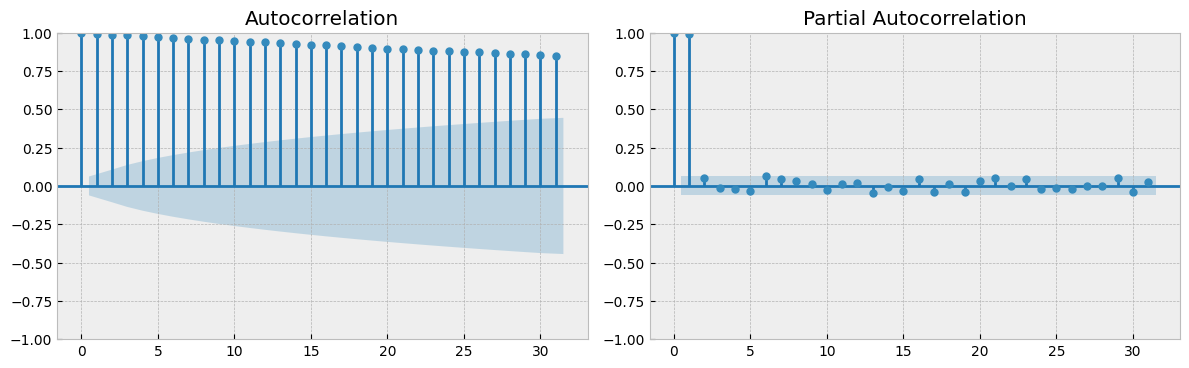

In [64]:
tsplot(data['Close'])

C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


NameError: name 'forecast' is not defined

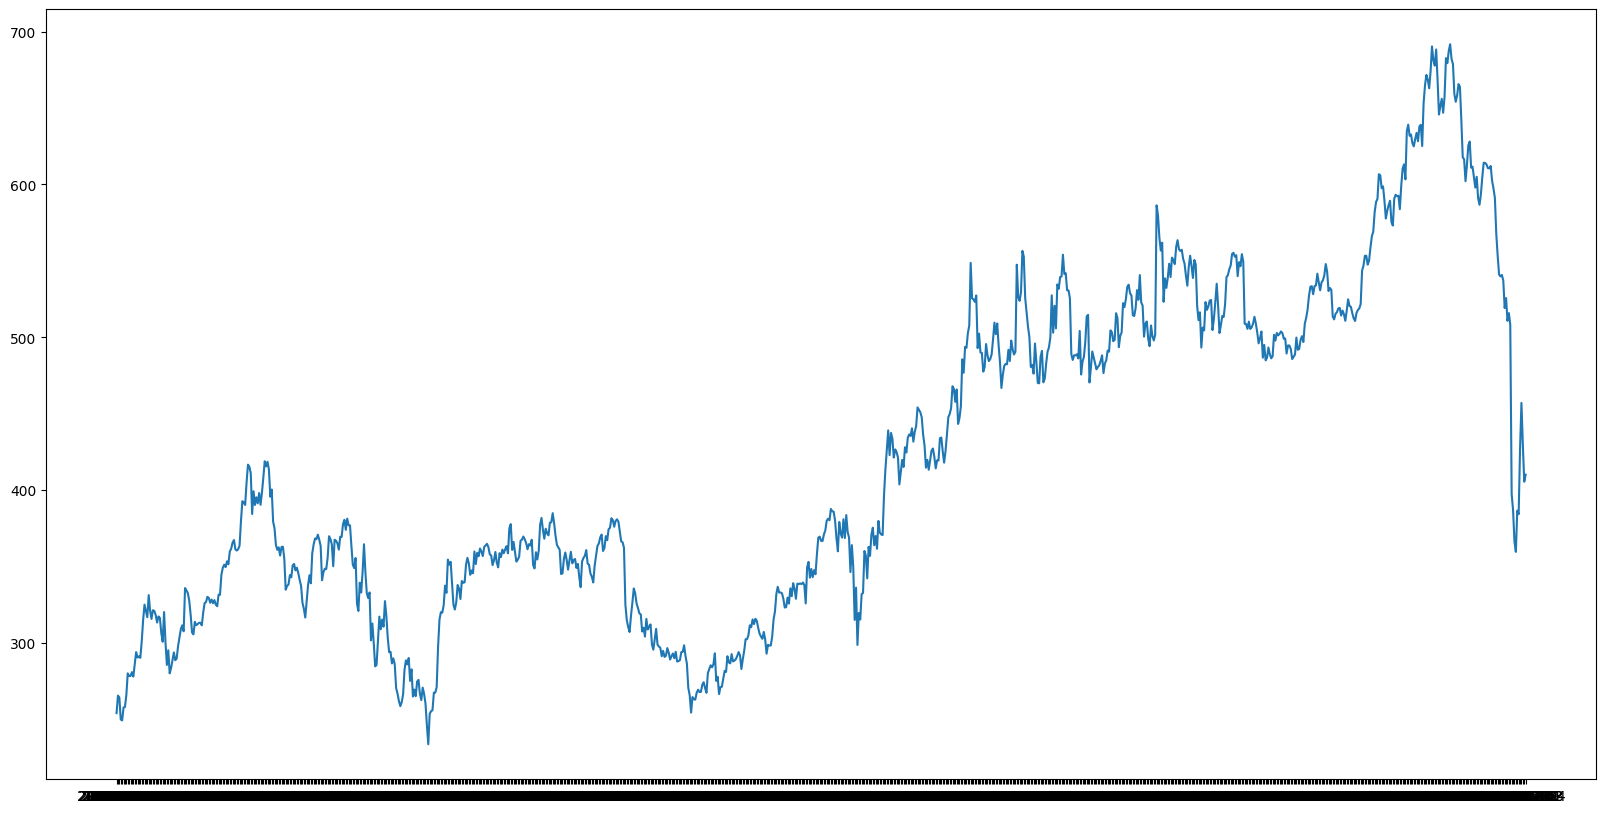

In [65]:
# fit model
# order parameter is where we define p, d and q values.
model = ARIMA(data.Close, order=(1, 1, 1))
arimaModel = model.fit()


# make prediction and plots
plotResults(data.Close,arimaModel.fittedvalues, "ARIMA").show()
final=getMetrics(data.Close,arimaModel.fittedvalues,  "ARIMA")
# store and print results


models.append("ARIMA")

results.append(final.RMSE.tolist()[0])
final

In [66]:
results.append(final.RMSE.tolist()[0])
final

Method   RMSE
0  Exponential Smoothening 3  11.05

In [67]:
newData = df[['Date', 'Close', 'Open']]
#  setting date as index
newData = newData.set_index('Date')

C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\AJAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


NameError: name 'forecast' is not defined

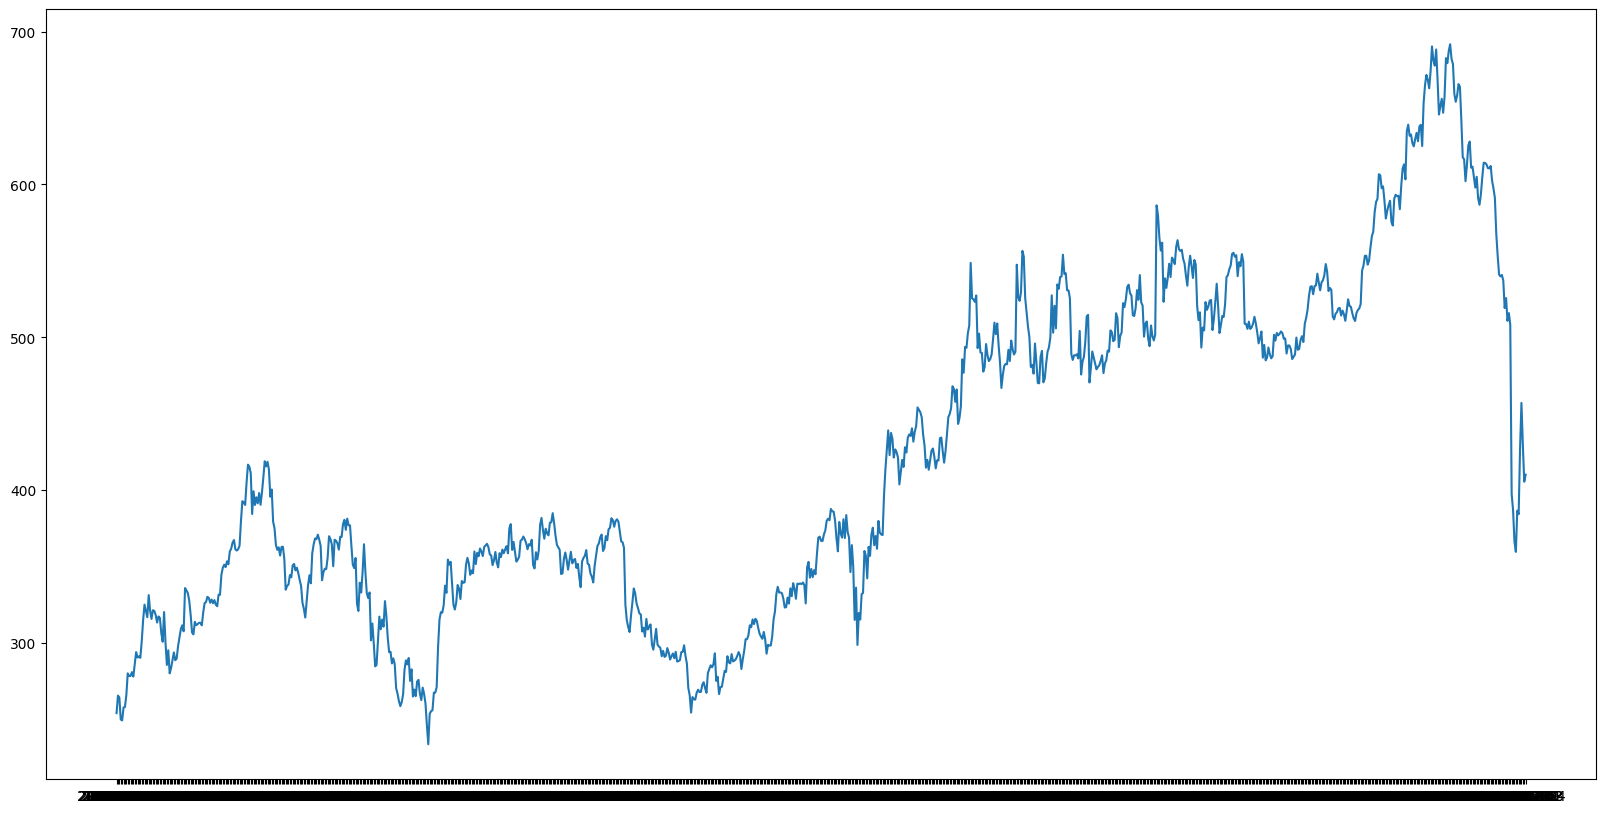

In [68]:
model=sm.tsa.statespace.SARIMAX(newData.Close, order=(1, 1, 1),seasonal_order=(1,1,1,5), exog=newData.Open)
sariMax=model.fit(disp=False)

# make prediction
plotResults(data.Close,sariMax.fittedvalues[1:], "SARIMAX").show()
final=getMetrics(data.Close[1:],sariMax.fittedvalues[1:], "SARIMAX")

# store and print results


models.append("SARIMAX")


results.append(final.RMSE.tolist()[0])
final